# Extended Data Figures

# Extended Data Figure 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
import warnings
import os
import functools
import upsetplot

warnings.filterwarnings('ignore')
plt.rc('font', family='Helvetica')

In [2]:
MBES = pd.read_csv('MBESv2_CORRECTED.csv')
MBES = MBES[MBES['Pool']!='F3-R3']

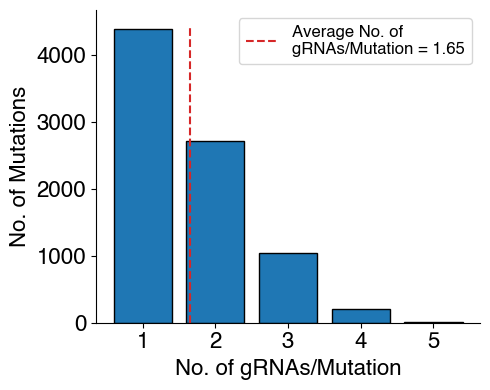

In [3]:
#plotting No. of gRNAs for each mutation
MBES_targ = MBES[MBES['classification']=='targeting guide']
ABE = MBES_targ[MBES_targ['Editor']=='ABE']
CBE = MBES_targ[MBES_targ['Editor']=='CBE']

u, c = np.unique(MBES_targ['mutation_idx'], return_counts=True)
u2, c2 = np.unique(c, return_counts=True)

fig, ax = plt.subplots(figsize=(5,4))

ax.bar(u2, c2, linewidth=1, edgecolor='black')

ax.plot([np.average(c), np.average(c)], [0,4450], linestyle='dashed', color='tab:red', label=f'Average No. of\ngRNAs/Mutation = {np.round(np.average(c), 2)}')
ax.legend(fontsize=12)
ax.set_xticks([1,2,3,4,5])
ax.spines[['top', 'right']].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=16,)
ax.set_ylabel('No. of Mutations', fontsize=16)
ax.set_xlabel('No. of gRNAs/Mutation', fontsize=16)
fig.tight_layout()

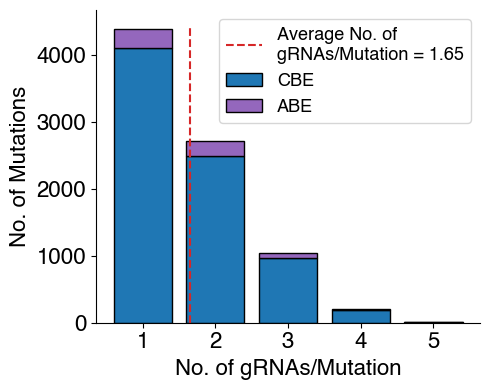

In [4]:
#plotting No. of gRNAs for each mutation
MBES_targ = MBES[MBES['classification']=='targeting guide']

ABE = MBES_targ[MBES_targ['Editor']=='ABE']
CBE = MBES_targ[MBES_targ['Editor']=='CBE']

u, c = np.unique(MBES_targ['mutation_idx'], return_counts=True)
u2, c2 = np.unique(c, return_counts=True)

u11, c11 = np.unique(CBE['mutation_idx'], return_counts=True)
u22, c22 = np.unique(c11, return_counts=True)

u111, c111 = np.unique(ABE['mutation_idx'], return_counts=True)
u222, c222 = np.unique(c111, return_counts=True)

fig, ax = plt.subplots(figsize=(5,4))

ax.bar(u22, c22, linewidth=1, edgecolor='black', color='tab:blue', label='CBE')
ax.bar(u222, c222, linewidth=1, bottom = c22, edgecolor='black', color='tab:purple', label='ABE')

ax.plot([np.average(c), np.average(c)], [0,4450], linestyle='dashed', color='tab:red', label=f'Average No. of\ngRNAs/Mutation = {np.round(np.average(c), 2)}')
ax.legend(fontsize=13)
ax.set_xticks([1,2,3,4,5])
ax.spines[['top', 'right']].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=16,)
ax.set_ylabel('No. of Mutations', fontsize=16)
ax.set_xlabel('No. of gRNAs/Mutation', fontsize=16)
fig.tight_layout()
#fig.savefig('figures/extended_1c.pdf')

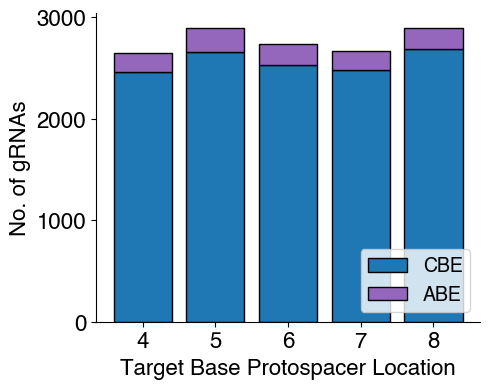

In [6]:
ABE = MBES_targ[MBES_targ['Editor']=='ABE']
CBE = MBES_targ[MBES_targ['Editor']=='CBE']

u, c = np.unique(CBE['Protospacer_Location'], return_counts=True)
u1,c1 = np.unique(ABE['Protospacer_Location'], return_counts=True)

fig, ax = plt.subplots(figsize=(5,4))

ax.bar(u, c, linewidth=1, edgecolor='black', color='tab:blue', label='CBE')
ax.bar(u1, c1, bottom = c, linewidth=1, edgecolor='black', color='tab:purple', label='ABE')
ax.legend(fontsize=14, loc='lower right')
ax.set_xticks([4,5,6,7,8])
ax.spines[['top', 'right']].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=16,)
ax.set_ylabel('No. of gRNAs', fontsize=16)
ax.set_xlabel('Target Base Protospacer Location', fontsize=16)
fig.tight_layout()
#fig.savefig('figures/extended_1b.pdf')

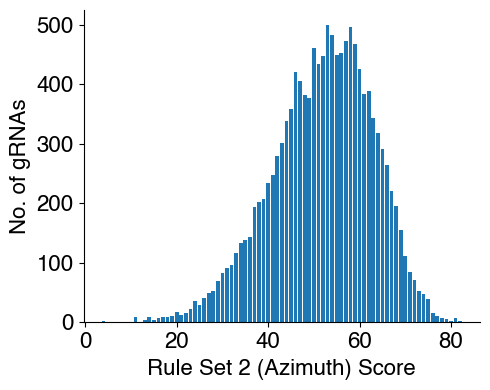

In [7]:
MBES_non_leg = MBES_targ[MBES_targ['legacy']==False]

u, c = np.unique(MBES_non_leg['OnTarget_Azimuth_Score'], return_counts=True)

fig, ax = plt.subplots(figsize=(5,4))

ax.bar(u, c, linewidth=0)
#ax.set_xticks([4,5,6,7,8])
ax.spines[['top', 'right']].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=16,)
ax.set_ylabel('No. of gRNAs', fontsize=16)
ax.set_xlabel('Rule Set 2 (Azimuth) Score', fontsize=16)
fig.tight_layout()
#fig.savefig('figures/extended_1d.pdf')

In [8]:
#include a histogram of the flank sizes as well
MBES = pd.read_csv('MBESv2_CORRECTED.csv')

input_data = pd.read_csv('source_data/msk_BE_pts_over_2_v2.csv')
input_data2 = pd.read_csv('source_data/input_MSK_over_2.csv')

muts_aacr = pd.read_csv('/Users/samgould/Desktop/FSR Lab/reference files/AACR_genie/data_mutations_extended.txt', sep='\t')
msk_aacr = muts_aacr[(muts_aacr['Center']=='MSK') & (muts_aacr['Variant_Type']=='SNP')]


In [9]:
df_mutation = pd.read_csv('/Users/samgould/Desktop/AACR_v13.1/data_mutations_extended.txt', header=0, sep='\t', comment="#", na_values = 'Not Applicable')

# only keep MSK data
df_mutation = df_mutation.iloc[:,[0, 37,2, 5,6,9,10,11,13,16]].reset_index(drop=True)
df_mutation = df_mutation[df_mutation['Center']=='MSK'].reset_index(drop=True)
df_mutation = df_mutation[df_mutation['Variant_Type'] == 'SNP'].reset_index(drop=True)
df_mutation = df_mutation.dropna(subset='HGVSc').reset_index(drop=True)
df_mutation['HGVSc'] = [x.split(':')[0] for x in df_mutation['HGVSc']]
df_mutation = df_mutation.drop_duplicates().reset_index(drop=True)

#and count tumor samples for a given mutation (by HGVSc)
df_mutation_count = df_mutation.groupby([df_mutation.columns.tolist()[x] for x in [0,1,3,4,5,6,7,8]], as_index = False).size()
df_mutation_count_sorted = df_mutation_count.sort_values(by = 'size')
df_mutation_count_sorted.columns =['gene_name_h', 'tx_id_h','start_h','end_h','class_h','type_h','ref_seq_h','alt_seq_h','count']

In [10]:
mutations_over_2 = df_mutation_count_sorted[df_mutation_count_sorted['count']>2].reset_index(drop=True)

alteration = []
for i, val in mutations_over_2.iterrows():
    ref = val['ref_seq_h']
    alt = val['alt_seq_h']
    alteration.append(f'{ref}>{alt}')

mutations_over_2['alteration'] = alteration

mutations_over_2_BE_amenable = mutations_over_2[mutations_over_2['alteration'].isin(['C>T', 'G>A', 'A>G', 'T>C'])]

In [11]:
h2m = pd.read_csv('/Users/samgould/Desktop/h2m_misc/H2M_v1_corrected.csv')
h2m_subset = h2m[(h2m['gene_name_h'].isin(list(np.unique(mutations_over_2['gene_name_h']))))].reset_index(drop=True)

identifier = []
for i, val in mutations_over_2.iterrows():
    a = val['gene_name_h']
    b = val['start_h']
    c = val['ref_seq_h']
    d = val['alt_seq_h']
    identifier.append(f'{a}_{b}_{c}_{d}')

mutations_over_2['identifier'] = identifier

identifier2 = []
for i, val in h2m_subset.iterrows():
    a = val['gene_name_h']
    b = val['start_h']
    c = val['ref_seq_h']
    d = val['alt_seq_h']
    identifier2.append(f'{a}_{b}_{c}_{d}')

h2m_subset['identifier'] = identifier2

In [12]:
h2m_subset_MSK = h2m_subset[h2m_subset['identifier'].isin(identifier)].drop_duplicates(subset='identifier').reset_index(drop=True)
h2m_subset_MSK

,gene_name_h,gene_id_h,tx_id_h,chr_h,exon_num_h,strand_h,match,start_h,end_h,ref_seq_h,...,Database,ID_db,pe_human,pe_mouse,be_human,be_mouse,expanded,flank_size,unique_id,identifier
0,ABL1,ENSG00000097007.13,ENST00000318560.5,chr9,11,+,True,133760790,133760790,C,...,AACR,NaN,False,False,False,False,False,64,24505_v,ABL1_133760790_C_T
1,ABL1,ENSG00000097007.13,ENST00000318560.5,chr9,11,+,True,133760714,133760714,C,...,AACR,NaN,False,False,False,False,False,23,24507_v,ABL1_133760714_C_T
2,ABL1,ENSG00000097007.13,ENST00000318560.5,chr9,11,+,True,133759967,133759967,C,...,AACR,NaN,False,False,False,False,False,20,24508_v,ABL1_133759967_C_T
3,ABL1,ENSG00000097007.13,ENST00000318560.5,chr9,11,+,True,133753910,133753910,G,...,AACR,NaN,False,False,False,False,False,175,24509_v,ABL1_133753910_G_A
4,ABL1,ENSG00000097007.13,ENST00000318560.5,chr9,11,+,True,133738360,133738360,G,...,AACR,NaN,False,False,False,False,False,109,24511_v,ABL1_133738360_G_A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24876,ZRSR2,ENSG00000169249.8,ENST00000307771.7,chrX,11,+,True,15841258,15841258,C,...,AACR,NaN,False,False,False,False,False,9,3908433_v,ZRSR2_15841258_C_T
24877,ZRSR2,ENSG00000169249.8,ENST00000307771.7,chrX,11,+,True,15841301,15841301,G,...,AACR,NaN,False,False,False,False,False,5,3908435_v,ZRSR2_15841301_G_A
24878,ZRSR2,ENSG00000169249.8,ENST00000307771.7,chrX,11,+,True,15836766,15836766,G,...,AACR,NaN,False,False,False,False,False,1,3908634_v,ZRSR2_15836766_G_A
24879,ZRSR2,ENSG00000169249.8,ENST00000307771.7,chrX,11,+,True,15840928,15840928,G,...,AACR,NaN,False,False,False,False,False,0,3908760_v,ZRSR2_15840928_G_C


In [13]:
sub3 = h2m_subset_MSK[h2m_subset_MSK['statement'].isin(['Class 0: This mutation can be originally modeled.',
       'Class 1: This mutation can be alternatively modeled.',
       'Class 2: This mutation can be modeled, but the effect may not be consistent.',
       'Class 4: Mutated sequences are not identical.'])]

alt2 = []
for i, val in sub3.iterrows():
    r = val['ref_seq_m']
    a = val['alt_seq_m']
    alt2.append(f'{r}>{a}')

sub3['alteration'] = alt2
sub4 = sub3[sub3['alteration'].isin(['C>T', 'G>A', 'A>G', 'T>C'])]

sub4['fs_right'] = [int(i[:-2]) for i in sub4['flank_size_right']]
sub4['fs_left'] = [int(i[:-2]) for i in sub4['flank_size_left']]

flank2 = sub4[(sub4['fs_right']>=2) & (sub4['fs_left']>=2)]

In [14]:
identifier3 = []
for i, val in input_data.iterrows():
    a = val['gene_name_h']
    b = int(val['start_h'])
    c = val['ref_seq_h']
    d = val['alt_seq_h']
    identifier3.append(f'{a}_{b}_{c}_{d}')

input_data['identifier']=identifier3

MBES_subset = MBES[(MBES['legacy']==False) & (MBES['classification']=='targeting guide')]

identifier4 = []
for i, val in MBES_subset.iterrows():
    a = val['gene_name_h']
    b = int(val['start_h'])
    c = val['ref_seq_h']
    d = val['alt_seq_h']
    identifier4.append(f'{a}_{b}_{c}_{d}')

MBES_subset['identifier']=identifier4
MBES_subset_no_dups = MBES_subset[['gene_name_m', 'start_m', 'end_m', 'ref_seq_m', 'alt_seq_m', 'identifier']].drop_duplicates()

MBES_subset_no_dups

,gene_name_m,start_m,end_m,ref_seq_m,alt_seq_m,identifier
0,Abl1,31668930.0,31668930.0,A,G,ABL1_133730186_A_G
3,Abl1,31691660.0,31691660.0,G,A,ABL1_133760819_G_A
5,Abl1,31690415.0,31690415.0,G,A,ABL1_133759553_G_A
7,Abl1,31684662.0,31684662.0,G,A,ABL1_133753910_G_A
8,Abl1,31674684.0,31674684.0,C,T,ABL1_133738315_C_T
...,...,...,...,...,...,...
13249,Zfhx3,109519960.0,109519960.0,G,A,ZFHX3_72992964_C_T
13250,Zfhx3,109519589.0,109519589.0,G,A,ZFHX3_72993335_C_T
13253,Zfhx3,109660257.0,109660257.0,C,T,ZFHX3_72845844_G_A
13254,Zfhx3,109519588.0,109519588.0,C,T,ZFHX3_72993336_G_A


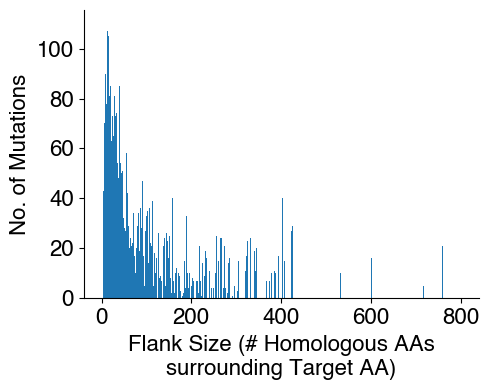

In [15]:
flank_merge = pd.merge(flank2, MBES_subset_no_dups, on='identifier')
flank_merge[flank_merge['classification_h'].isin(['Missense', 'Nonsense'])]
np.unique(flank_merge['flank_size'], return_counts=True)


fig, ax = plt.subplots(figsize=(5,4))

ax.hist(flank_merge['flank_size'], bins = np.linspace(0,800, 801))

ax.spines[['top', 'right']].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=16,)
ax.set_ylabel('No. of Mutations', fontsize=16)
ax.set_xlabel('Flank Size (# Homologous AAs\nsurrounding Target AA)', fontsize=16)
fig.tight_layout()
#fig.savefig('figures/extended_1a.pdf')


In [16]:
#ABE_controls = pd.DataFrame(dict(zip(['NT', 'ST'], [10,26])))
ABE_controls = pd.DataFrame(dict(zip(['u','c'], [['NT', 'ST'],[10, 26]])))
CBE_controls = pd.DataFrame(dict(zip(['u','c'], [['NT', 'ST'],[123, 313]])))

ABE_u, ABE_c = ['Missense', 'Splice/Intron', 'Nonstop'], [980, 53, 1]
CBE_u, CBE_c = ['Missense', 'Splice/Intron', 'Nonsense'], [10373+418, 177+33, 1675+130]

ABE_df = pd.DataFrame(dict(zip(['u', 'c'], [ABE_u,ABE_c])))
CBE_df = pd.DataFrame(dict(zip(['u', 'c'], [CBE_u,CBE_c])))

ABE_final = pd.concat((ABE_df, ABE_controls))
CBE_final = pd.concat((CBE_df, CBE_controls))

print(len(MBES[MBES['Editor']=='ABE']))
print(sum(ABE_final['c']))
print(len(MBES[MBES['Editor']=='CBE']))
print(sum(CBE_final['c']))


1070
1070
13242
13242


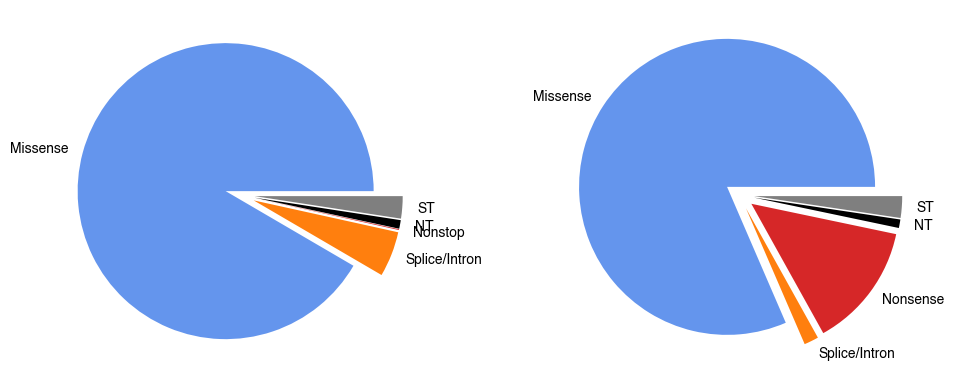

In [17]:

fig, ax = plt.subplots(1,2,figsize=(10,4))


colors1=['cornflowerblue', 'tab:orange', 'tab:red', 'black', 'tab:grey']
colors2=['cornflowerblue', 'tab:orange', 'tab:red', 'black', 'tab:grey']

ax[0].pie(ABE_final['c'], explode=[.1]*len(ABE_final),labels=ABE_final['u'], colors=colors1)
ax[1].pie(CBE_final['c'], explode=[.1]*len(CBE_final),labels=CBE_final['u'], colors=colors2)

fig.tight_layout()
#fig.savefig('figures/extended_1ef.pdf')

# Extended Data Figure 4

In [3]:
samp_CBE = ['D24-12799-6840R_guide_split_BARCODES',
 'D24-12800-6840R_guide_split_BARCODES',
 'D24-12801-6840R_guide_split_BARCODES',
 'D24-12802-6840R_guide_split_BARCODES',
 'D24-12803-6840R_guide_split_BARCODES',
 'D24-12804-6840R_guide_split_BARCODES',
 'D24-12805-6840R_guide_split_BARCODES',
 'D24-12806-6840R_guide_split_BARCODES',
 'D24-12807-6840R_guide_split_BARCODES',
 'D24-12808-6840R_guide_split_BARCODES',
 'D24-12809-6840R_guide_split_BARCODES',
 'D24-12810-6840R_guide_split_BARCODES',
 'D24-12811-6840R_guide_split_BARCODES',
 'D24-12812-6840R_guide_split_BARCODES',
 'D24-12813-6840R_guide_split_BARCODES',
 'D24-12814-6840R_guide_split_BARCODES',
 'D24-12815-6840R_guide_split_BARCODES',
 'D24-12816-6840R_guide_split_BARCODES',
 'D24-12817-6840R_guide_split_BARCODES',
 'D24-12818-6840R_guide_split_BARCODES',
 'D24-12819-6840R_guide_split_BARCODES',
 'D24-12820-6840R_guide_split_BARCODES',
 'D24-12821-6840R_guide_split_BARCODES',
 'D24-12822-6840R_guide_split_BARCODES',
 'D24-12823-6840R_guide_split_BARCODES',
 'D24-12824-6840R_guide_split_BARCODES',
 'D24-12825-6840R_guide_split_BARCODES',
 'D24-12826-6840R_guide_split_BARCODES',
 'D24-12827-6840R_guide_split_BARCODES',
 'D24-12828-6840R_guide_split_BARCODES',
 'D24-12829-6840R_guide_split_BARCODES',
 'D24-12830-6840R_guide_split_BARCODES',
 'D24-12831-6840R_guide_split_BARCODES',
 'D24-12832-6840R_guide_split_BARCODES',
 'D24-12833-6840R_guide_split_BARCODES',
 'D24-12834-6840R_guide_split_BARCODES',
 'D24-12835-6840R_guide_split_BARCODES',
 'D24-12836-6840R_guide_split_BARCODES',
 'D24-12837-6840R_guide_split_BARCODES']

sample_id_CBE = ['spleen1', 'spleen2','spleen3','spleen4','spleen5', 'spleen6', 'spleen7', 'spleen8', 'spleen9', 'bonemarrow1','bonemarrow2','bonemarrow3',
            'bonemarrow4','bonemarrow5', 'bonemarrow6','bonemarrow7','bonemarrow8', 'bonemarrow9',
             'bonemarrow10','meninges1','meninges2','meninges3','meninges4','meninges5', 'meninges6', 'meninges7',
             'meninges8', 'meninges9', 'meninges10',
            'input_rep1', 'input_rep2', 'input_rep3', 'd5_rep1', 'd5_rep2', 'd5_rep3', 'd15_rep1',
            'd15_rep2', 'd15_rep3', 'plasmidlib']


samp_ABE = ['D24-12774-6848T_guide_split_BARCODES',
 'D24-12775-6848T_guide_split_BARCODES',
 'D24-12776-6848T_guide_split_BARCODES',
 'D24-12777-6848T_guide_split_BARCODES',
 'D24-12778-6848T_guide_split_BARCODES',
 'D24-12779-6848T_guide_split_BARCODES',
 'D24-12780-6848T_guide_split_BARCODES',
 'D24-12781-6848T_guide_split_BARCODES',
 'D24-12782-6848T_guide_split_BARCODES',
 'D24-12783-6848T_guide_split_BARCODES',
 'D24-12784-6848T_guide_split_BARCODES',
 'D24-12785-6848T_guide_split_BARCODES',
 'D24-12786-6848T_guide_split_BARCODES',
 'D24-12787-6848T_guide_split_BARCODES',
 'D24-12788-6848T_guide_split_BARCODES',
 'D24-12789-6848T_guide_split_BARCODES',
 'D24-12790-6848T_guide_split_BARCODES',
 'D24-12791-6848T_guide_split_BARCODES',
 'D24-12792-6848T_guide_split_BARCODES',
 'D24-12793-6848T_guide_split_BARCODES',
 'D24-12794-6848T_guide_split_BARCODES',
 'D24-12795-6848T_guide_split_BARCODES',
 'D24-12796-6848T_guide_split_BARCODES',
 'D24-12797-6848T_guide_split_BARCODES',
 'D24-12798-6848T_guide_split_BARCODES',]

sample_id_ABE = ['spleen1', 'spleen2','spleen3','spleen4','spleen5', 'bonemarrow1','bonemarrow2','bonemarrow3',
            'bonemarrow4','bonemarrow5','meninges1','meninges2','meninges3','meninges4','meninges5',
            'input_rep1', 'input_rep2', 'input_rep3', 'd5_rep1', 'd5_rep2', 'd5_rep3', 'd15_rep1',
            'd15_rep2', 'd15_rep3', 'plasmidlib']


ABE_samples = pd.DataFrame(dict(zip(['file_name', 'sample'], [samp_ABE, sample_id_ABE])))
CBE_samples = pd.DataFrame(dict(zip(['file_name', 'sample'], [samp_CBE, sample_id_CBE])))

ABE_samp_dict = dict(zip(samp_ABE, sample_id_ABE))
CBE_samp_dict = dict(zip(samp_CBE, sample_id_CBE))

In [4]:
#ABE
df_holder_counts_ABE = []
for key in ABE_samp_dict.keys():

    gg = pd.read_csv(f'240807Hem_ABE/counts/{key}_count_df.csv')
    df_holder_counts_ABE.append(gg)

count_dict_ABE = dict(zip(ABE_samp_dict.values(), df_holder_counts_ABE))

#CBE
df_holder_counts_CBE = []
for key in CBE_samp_dict.keys():

    gg = pd.read_csv(f'240807HemA_CBE/counts/{key}_count_df.csv')
    df_holder_counts_CBE.append(gg)

count_dict_CBE = dict(zip(CBE_samp_dict.values(), df_holder_counts_CBE))

MBES = pd.read_csv('MBESv2_CORRECTED.csv')
MBES = MBES.rename(columns = {'gRNA_id':'Guide_ID'})
ABE_pool_guides = list(MBES[MBES['Pool']=='F1-R1']['Guide_ID'])
CBE_pool_guides = list(MBES[MBES['Pool']=='F2-R2']['Guide_ID'])


names = []
bc_count = []
guide_count = []
#guide_id = []
guide_id_cbe = []
for i in list(count_dict_CBE.keys()):


    names.append(i)
    d = count_dict_CBE[i]
    d = d[d['Guide_ID'].isin(CBE_pool_guides)]

    bc_count.append(list(d['bc_count']))
    
    guide_count.append(list(d['matched_guide_count']))
    guide_id_cbe.append(list(d['Guide_ID']))

bc_df_cbe = pd.DataFrame(dict(zip(names, bc_count)))
guide_df_cbe = pd.DataFrame(dict(zip(names, guide_count)))


names = []
bc_count = []
guide_count = []
guide_id_abe = []
for i in list(count_dict_ABE.keys()):

    if i=='spleen5':
        continue
    else:
        names.append(i)
        d = count_dict_ABE[i]
        d = d[d['Guide_ID'].isin(ABE_pool_guides)]

        bc_count.append(list(d['bc_count']))
        guide_count.append(list(d['matched_guide_count']))
        guide_id_abe.append(list(d['Guide_ID']))

bc_df_abe = pd.DataFrame(dict(zip(names, bc_count)))
guide_df_abe = pd.DataFrame(dict(zip(names, guide_count)))

In [5]:
bc_df_cbe_normed = bc_df_cbe.copy()
bc_df_abe_normed = bc_df_abe.copy()

for i, val in enumerate(list(bc_df_cbe_normed.columns)):

    sum1 = sum(bc_df_cbe_normed[val])
    bc_df_cbe_normed[val] = 100*(bc_df_cbe_normed[val]/sum1)


for i, val in enumerate(list(bc_df_abe_normed.columns)):

    sum1 = sum(bc_df_abe_normed[val])
    bc_df_abe_normed[val] = 100*(bc_df_abe_normed[val]/sum1)

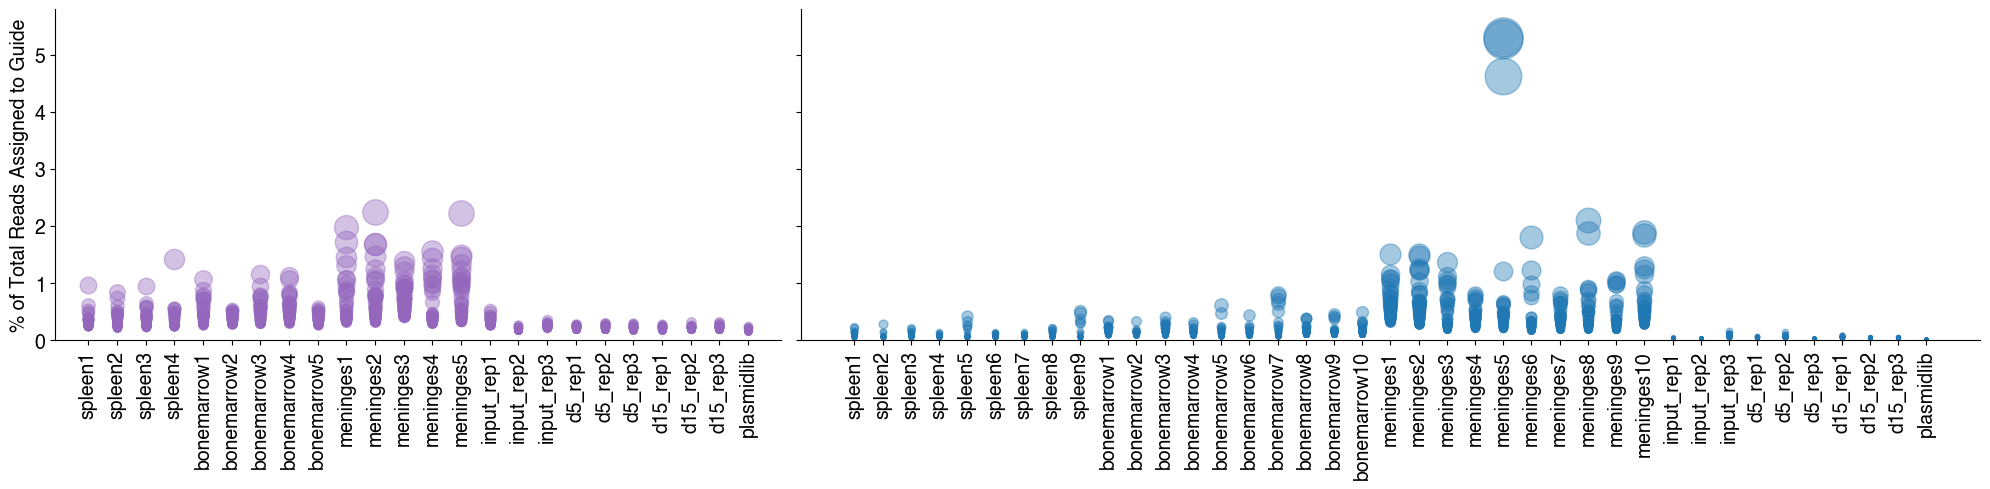

In [6]:
fig, ax = plt.subplots(1,2,figsize=(20,5), sharey=True, width_ratios=[len(bc_df_abe_normed.columns), len(bc_df_cbe_normed.columns)])
for i, val in enumerate(list(bc_df_abe_normed.columns)):
    top_hits = sorted(bc_df_abe_normed[val])[::-1]
    to_plot = top_hits[:50]

    for j in to_plot:
        ax[0].scatter([i], [j], s=j*150, color='tab:purple', alpha=.4)

ax[0].set_xticks(range(len(bc_df_abe_normed.columns)));
ax[0].set_xticklabels(bc_df_abe_normed.columns, rotation=90);

for i, val in enumerate(list(bc_df_cbe_normed.columns)):
    top_hits = sorted(bc_df_cbe_normed[val])[::-1]
    to_plot = top_hits[:50]

    for j in to_plot:
        ax[1].scatter([i], [j], s=j*150, color='tab:blue', alpha=.4)

ax[1].set_xticks(range(len(bc_df_cbe_normed.columns)));
ax[1].set_xticklabels(bc_df_cbe_normed.columns, rotation=90);


ax[0].set_ylabel('% of Total Reads Assigned to Guide', fontsize=14)
ax[0].spines[['top', 'right']].set_visible(False)
ax[0].tick_params(axis='both', which='major', labelsize=14,)
ax[1].spines[['top', 'right']].set_visible(False)
ax[1].tick_params(axis='both', which='major', labelsize=14,)
ax[0].set_ylim(0,5.8)
fig.tight_layout()
#fig.savefig('figures/extended_3cd.pdf')

In [7]:
a = list(bc_df_cbe_normed.columns)

n = ['S REP1', 'S REP2', 'S REP3', 'S REP4', 'S REP5', 'S REP6',
'S REP7', 'S REP8', 'S REP9', 'B REP1', 'B REP2',
'B REP3', 'B REP4', 'B REP5', 'B REP6',
'B REP7', 'B REP8', 'B REP9', 'B REP10',
'M REP1', 'M REP2', 'M REP3', 'M REP4', 'M REP5',
'M REP6', 'M REP7', 'M REP8', 'M REP9', 'M REP10',
'INPUT REP1', 'INPUT REP2', 'INPUT REP3', 'D5 REP1', 'D5 REP2',
'D5 REP3', 'D15 REP1', 'D15 REP2', 'D15 REP3', 'PLASMID']

name_dict = dict(zip(a,n))

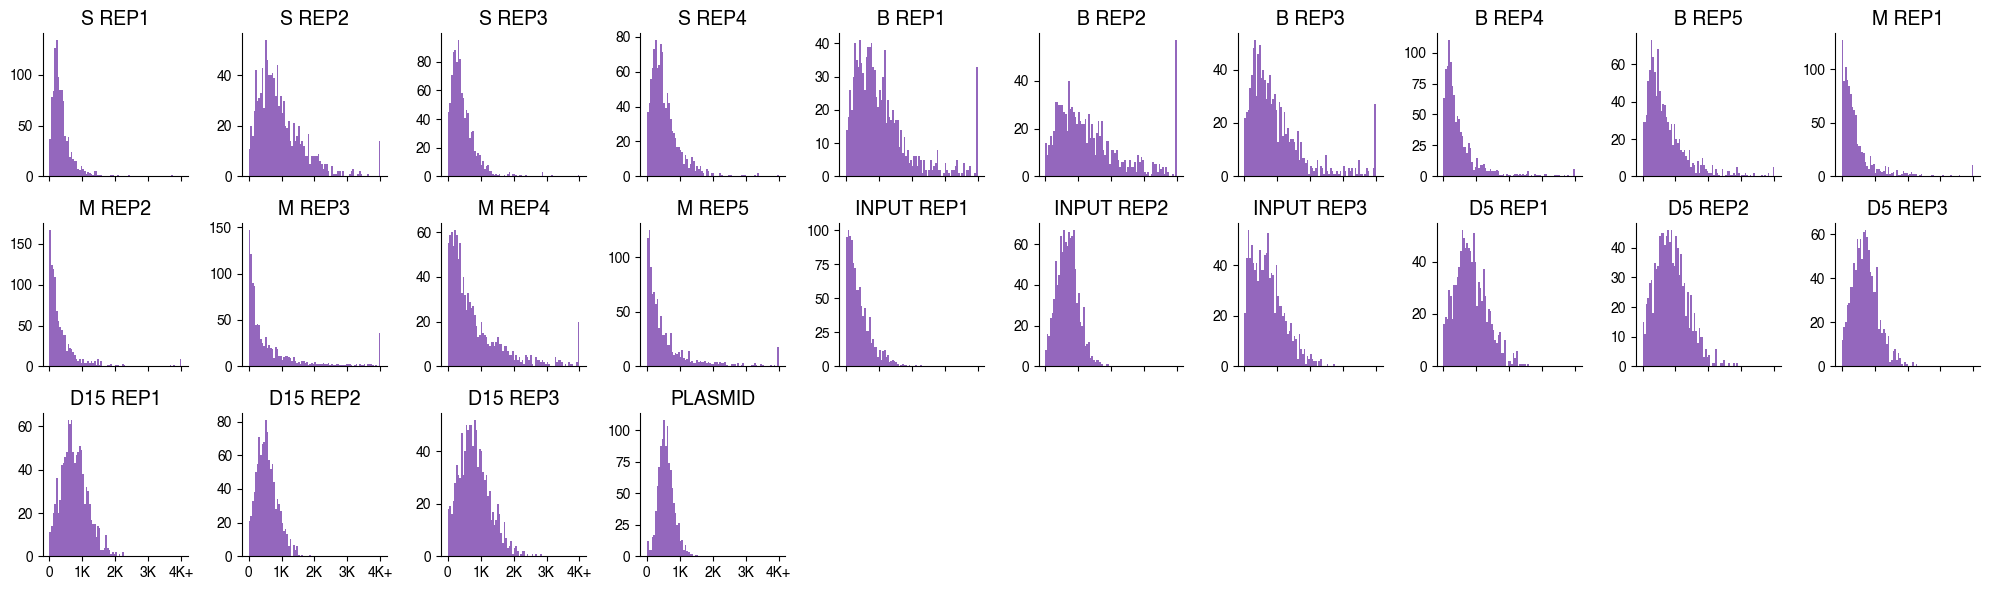

In [8]:
fig, ax = plt.subplots(3,10,figsize=(20,6), sharey=False, sharex=True)

for i in range(3):
    for k in range(10):
        num_samp = (i*10)+k
        #print(num_samp)
        if num_samp<len(bc_df_abe.columns):
            samp = list(bc_df_abe.columns)[num_samp]
            bins=np.linspace(0,4000, 81)
            ax[i][k].hist(np.clip(bc_df_abe[samp], bins[0], bins[-1]), bins=bins,color='tab:purple', edgecolor='black', linewidth=0, density=False)
            ax[i][k].set_title(name_dict[samp], fontsize=14)
            ax[i][k].spines[['top', 'right']].set_visible(False)
            ax[i][k].set_xticks([0,1000,2000,3000,4000])
            ax[i][k].set_xticklabels(['0','1K','2K','3K','4K+'])
            #ax.hist[]

for i in range(4,10):
    fig.delaxes(ax[2][i])

fig.tight_layout()
#fig.savefig('figures/extended_3a.pdf')

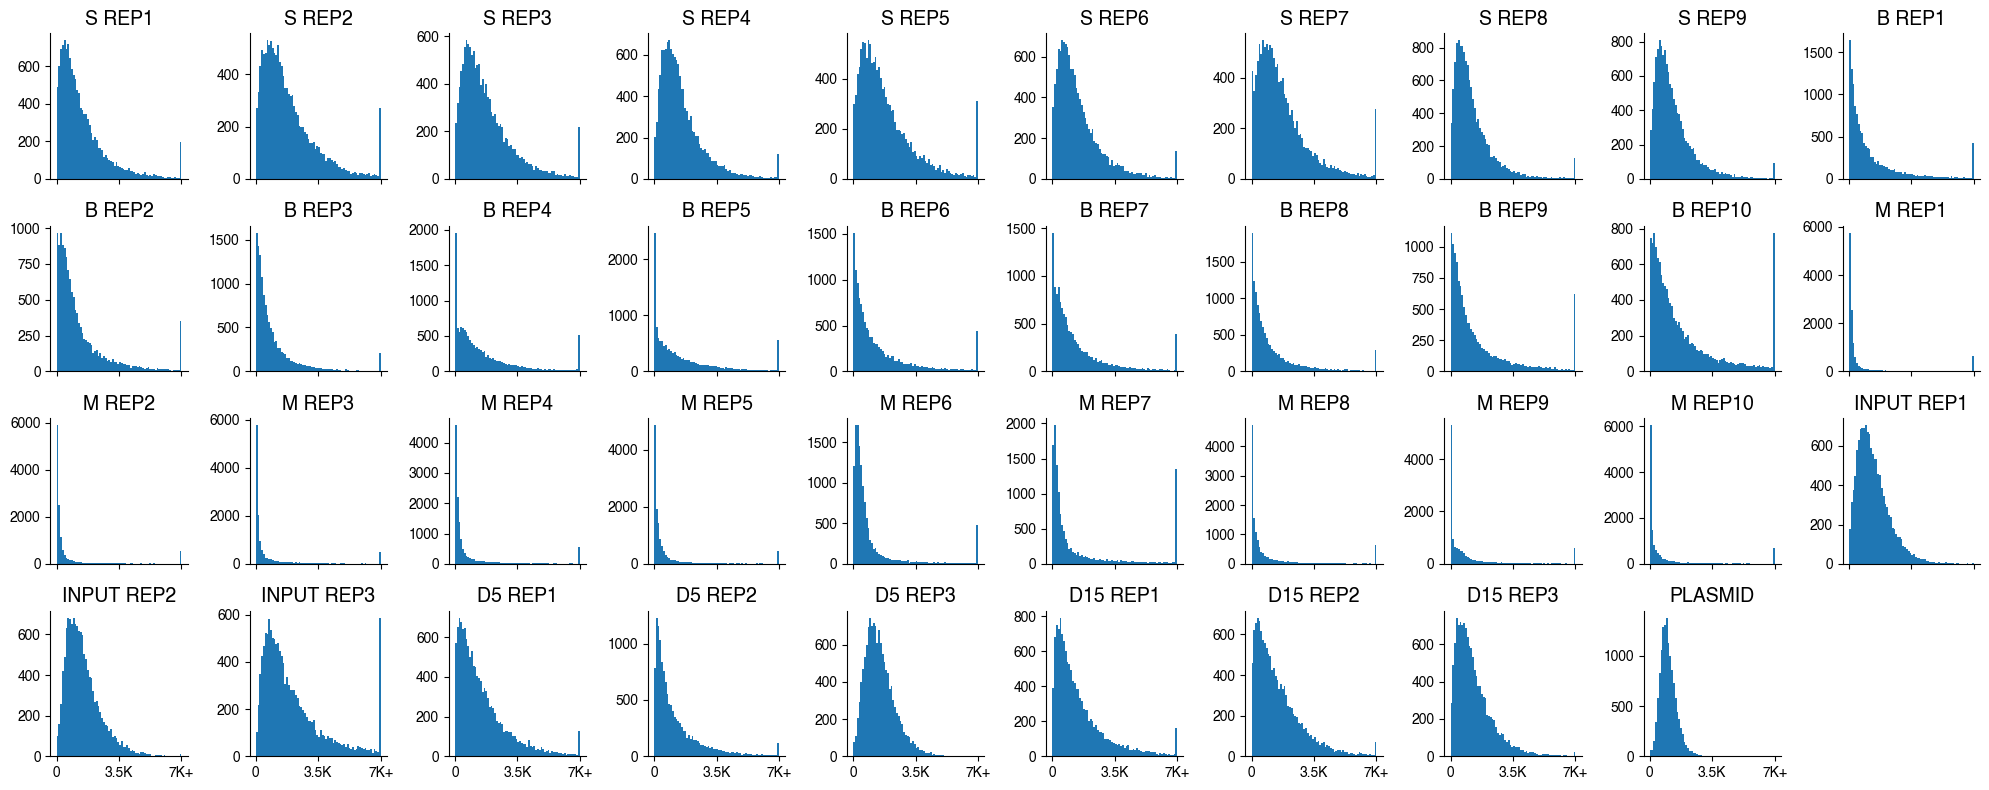

In [9]:
fig, ax = plt.subplots(4,10,figsize=(20,8), sharey=False, sharex=True)

for i in range(4):
    for k in range(10):
        num_samp = (i*10)+k
        #print(num_samp)
        if num_samp<len(bc_df_cbe.columns):
            samp = list(bc_df_cbe.columns)[num_samp]
            bins=np.linspace(0,7000, 71)
            ax[i][k].hist(np.clip(bc_df_cbe[samp], bins[0], bins[-1]), bins=bins,edgecolor='black', linewidth=0, density=False)
            ax[i][k].set_title(name_dict[samp], fontsize=14)
            ax[i][k].spines[['top', 'right']].set_visible(False)
            ax[i][k].set_xticks([0,3500,7000])
            ax[i][k].set_xticklabels(['0','3.5K','7K+'])
            #ax.hist[]

fig.delaxes(ax[3][9])

fig.tight_layout()
#fig.savefig('figures/extended_3b.pdf')

# Extended Data Figure 5

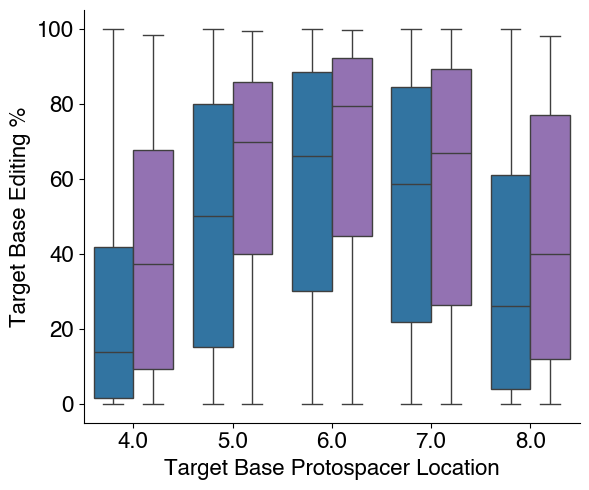

In [10]:
master_targ = pd.read_csv('master_table_unfiltered.csv')

read_cutoff = 10
m = master_targ[(master_targ['sensor_reads']>=read_cutoff) & (master_targ['classification']=='targeting guide')]

fig, ax = plt.subplots(figsize=(6,5))

sns.boxplot(data = m, x='Protospacer_Location', y='target_base_edit_perc', hue='Editor', palette=['tab:blue', 'tab:purple'], legend=False)

ax.spines[['top', 'right']].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=16,)
ax.set_ylabel('Target Base Editing %', fontsize=16)
ax.set_xlabel('Target Base Protospacer Location', fontsize=16)
fig.tight_layout()
#fig.savefig('figures/extended4a.pdf')

In [11]:
MBES = pd.read_csv('MBESv2_CORRECTED.csv')

MBES_targ = MBES[MBES['classification']=='targeting guide']

ABE = MBES_targ[MBES_targ['Editor']=='ABE']
CBE = MBES_targ[MBES_targ['Editor']=='CBE']

ABE_guides = list(ABE['gRNA_id'])
CBE_guides = list(CBE['gRNA_id'])


k = os.listdir('ABE_editing/MLE')
names = []
dfs = []
for i in k:
    nombre = i.split('_')[0]

    aa = pd.read_csv(f'ABE_editing/MLE/{i}')
    aa = aa[aa['Guide_ID'].isin(ABE_guides)]
    names.append(nombre)
    dfs.append(aa)

ABE_mle_edit = dict(zip(names, dfs))

k = os.listdir('CBE_editing_UPDATED/MLE')

names = []
dfs = []
for i in k:
    nombre = i.split('_')[0]
    aa = pd.read_csv(f'CBE_editing_UPDATED/MLE/{i}')
    aa = aa[aa['Guide_ID'].isin(CBE_guides)]
    names.append(nombre)
    dfs.append(aa)

CBE_mle_edit = dict(zip(names, dfs))

In [12]:
#need to update and filter for sensor counts

read_cutoff = 10

d1 = dict(zip(list(ABE_mle_edit.keys()), ['INPUT', 'S', 'M', 'PLASMID', 'B', 'D5', 'D15']))


new_cols = []
reads = []
read_names = []
for i in CBE_mle_edit.keys():
    a = CBE_mle_edit[i]
    new_cols.append(a['target_base_edit_perc'])
    reads.append(a['Reads_aligned_all_amplicons'])
    read_names.append(f'reads_{i}')

names22 = [d1[i] for i in list(CBE_mle_edit.keys())]
CBE_editing = pd.DataFrame(dict(zip(names22, new_cols)))

CBE_reads = pd.DataFrame(dict(zip(read_names, reads)))
CBE_editing_combined = pd.concat([CBE_editing, CBE_reads], axis=1)
CBE_editing_filtered = CBE_editing_combined[(CBE_editing_combined['reads_input']>=read_cutoff) & (CBE_editing_combined['reads_spleen']>=read_cutoff) & (CBE_editing_combined['reads_meninges']>=read_cutoff) & (CBE_editing_combined['reads_plasmid']>=read_cutoff) & (CBE_editing_combined['reads_bonemarrow']>=read_cutoff) & (CBE_editing_combined['reads_d5']>=read_cutoff) &(CBE_editing_combined['reads_d15']>=read_cutoff)]



new_cols = []
reads = []
read_names = []
for i in ABE_mle_edit.keys():
    a = ABE_mle_edit[i]
    new_cols.append(a['target_base_edit_perc'])
    reads.append(a['Reads_aligned_all_amplicons'])
    read_names.append(f'reads_{i}')


names22 = [d1[i] for i in list(ABE_mle_edit.keys())]
ABE_editing = pd.DataFrame(dict(zip(names22, new_cols)))
ABE_reads = pd.DataFrame(dict(zip(read_names, reads)))

ABE_editing_combined = pd.concat([ABE_editing, ABE_reads], axis=1)

ABE_editing_filtered = ABE_editing_combined[(ABE_editing_combined['reads_input']>=read_cutoff) & (ABE_editing_combined['reads_spleen']>=read_cutoff) & (ABE_editing_combined['reads_meninges']>=read_cutoff) & (ABE_editing_combined['reads_plasmid']>=read_cutoff) & (ABE_editing_combined['reads_bonemarrow']>=read_cutoff) & (ABE_editing_combined['reads_d5']>=read_cutoff) &(ABE_editing_combined['reads_d15']>=read_cutoff)]
ABE_editing_filtered

,INPUT,S,M,PLASMID,B,D5,D15,reads_input,reads_spleen,reads_meninges,reads_plasmid,reads_bonemarrow,reads_d5,reads_d15
0,0.000000,4.991948,36.962025,0.0,4.191617,1.929530,13.364055,699,621,1185,121,1169,1192,868
3,0.000000,56.792688,8.047465,0.0,53.646738,22.960152,40.912969,858,4814,4635,185,8062,2108,2344
57,1.283697,39.771547,71.227197,0.0,76.371308,65.404930,65.272727,779,1926,2412,243,4977,2272,2200
91,0.410537,67.907634,94.911783,0.0,70.086207,79.592406,86.170468,2923,4244,6348,483,4640,3582,4165
102,3.708609,96.437055,90.697674,0.0,87.095658,91.070336,98.797737,2265,1263,5074,330,5781,3270,2828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14275,0.000000,83.435583,99.699609,0.0,94.270833,94.256259,93.638677,518,489,3329,160,960,679,786
14281,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,161,217,198,75,257,103,93
14324,1.269036,10.655738,0.439883,0.0,7.033278,4.115523,6.906615,1576,1342,1364,180,4237,2770,2056
14335,0.000000,27.673167,13.601236,0.0,14.955040,38.813283,37.428896,1140,2974,647,158,4226,1837,1758


[Text(1, 0.5, 'M'),
 Text(1, 1.5, 'S'),
 Text(1, 2.5, 'B'),
 Text(1, 3.5, 'D5'),
 Text(1, 4.5, 'D15'),
 Text(1, 5.5, 'INPUT'),
 Text(1, 6.5, 'PLASMID')]

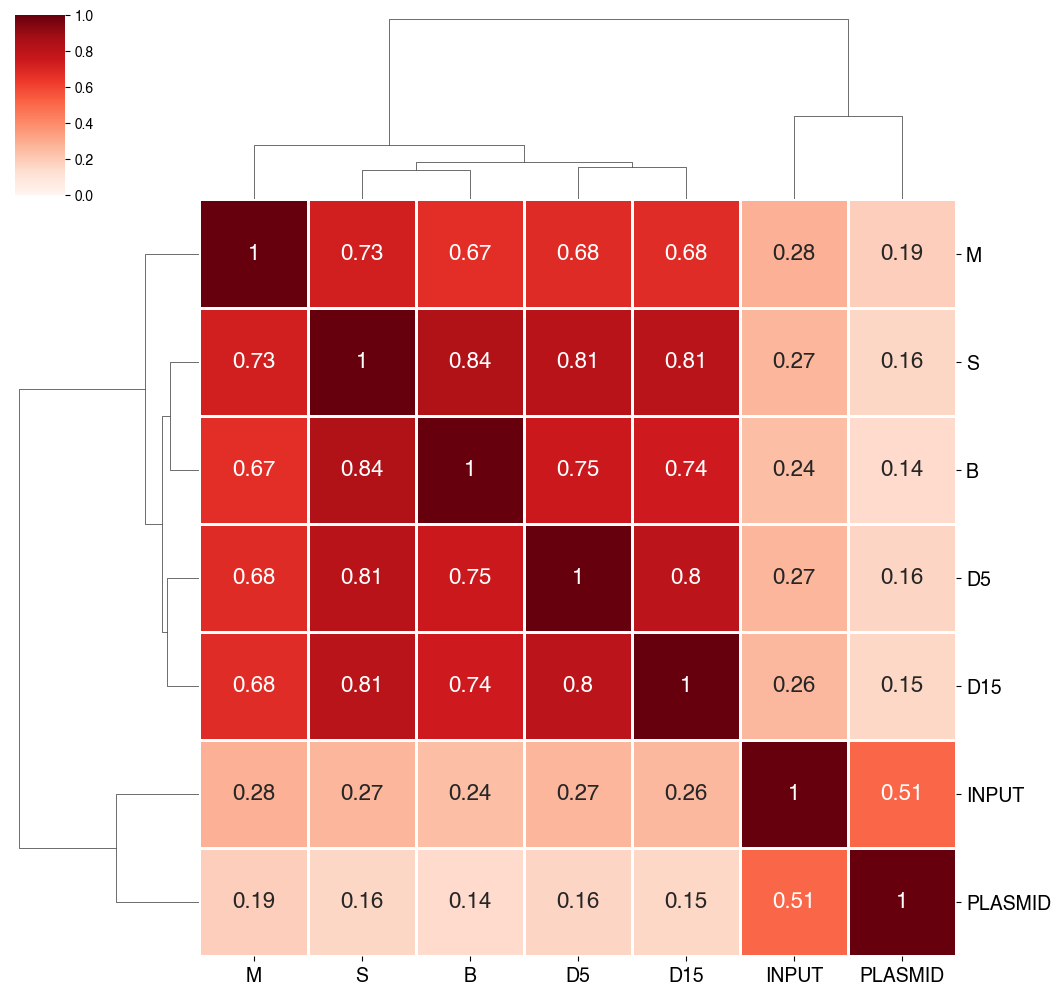

In [13]:
g = sns.clustermap(CBE_editing_filtered[names22].corr(method='pearson'), cmap='Reds', vmin=0, annot=True, linewidth=1, annot_kws={"size": 16})

g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize = 14)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), fontsize = 14, rotation=0)
#g.savefig('figures/CBE_editing_heatmap.pdf')

[Text(1, 0.5, 'M'),
 Text(1, 1.5, 'D5'),
 Text(1, 2.5, 'D15'),
 Text(1, 3.5, 'S'),
 Text(1, 4.5, 'B'),
 Text(1, 5.5, 'INPUT'),
 Text(1, 6.5, 'PLASMID')]

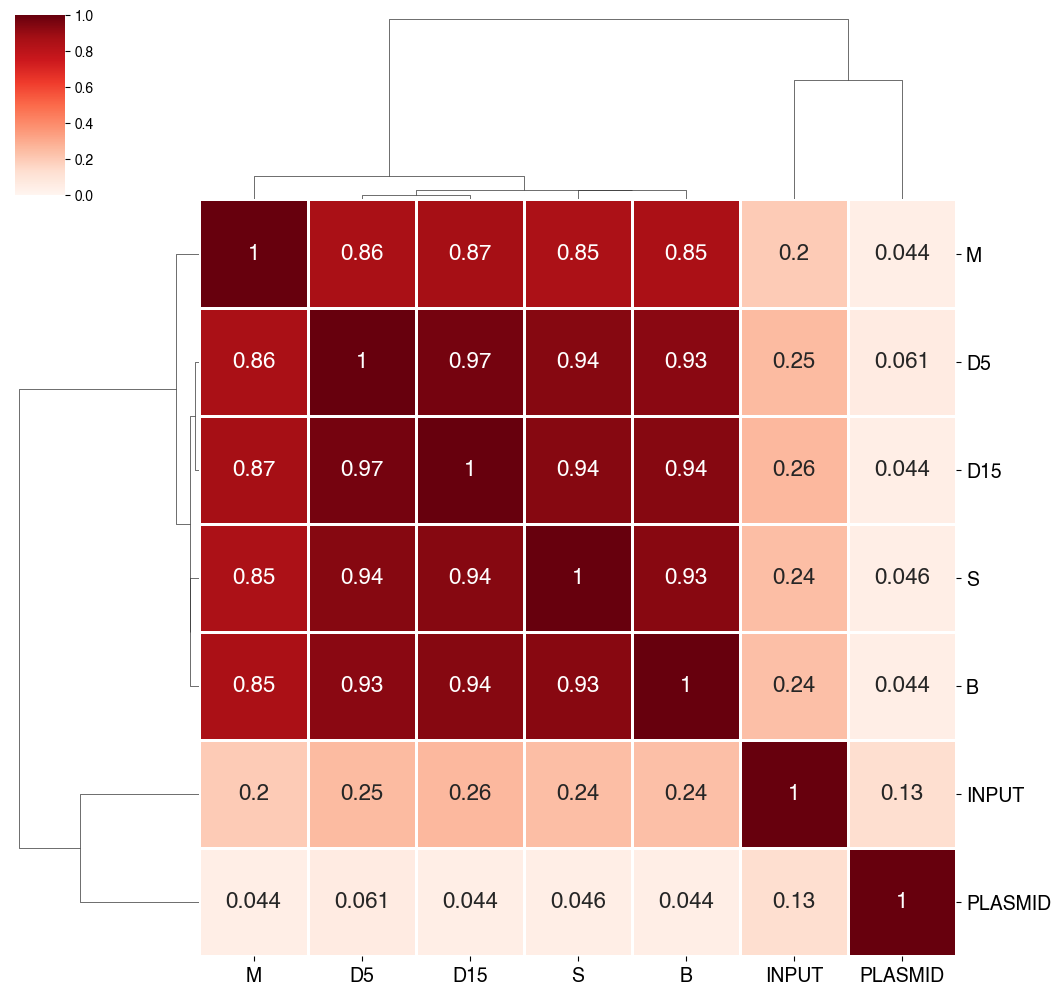

In [14]:
g = sns.clustermap(ABE_editing_filtered[names22].corr(method='pearson'), cmap='Reds', vmin=0, annot=True, linewidth=1, annot_kws={"size": 16})

g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize = 14)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), fontsize = 14, rotation=0)
#g.savefig('figures/ABE_editing_heatmap.pdf')

In [15]:
def ecdf(a):
    x, counts = np.unique(a, return_counts=True)
    cusum = np.cumsum(counts)
    return x, cusum / cusum[-1]

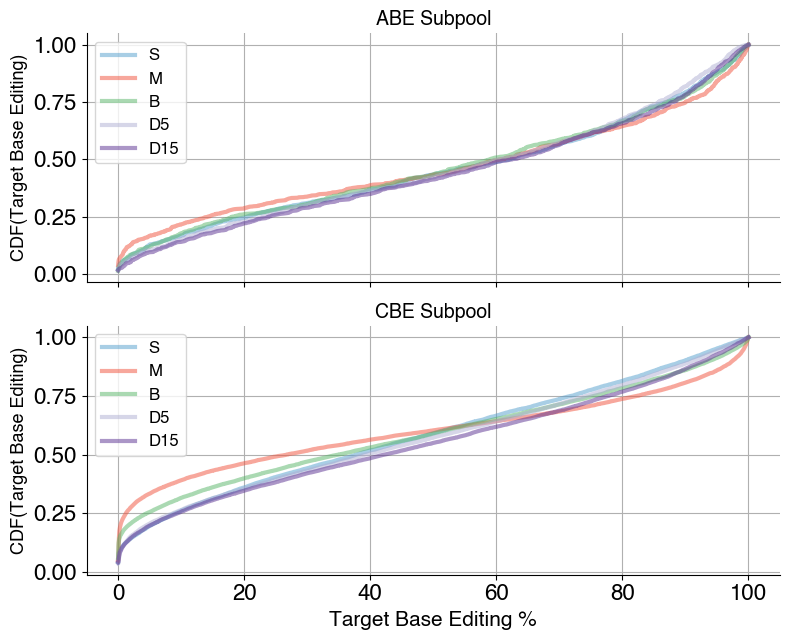

In [16]:
cs = ["#f47824", "#539ecd", "#f0513b", "#231f20", "#56b466", "#afaed3", "#582e90"]
c_dict = dict(zip(names22, cs))

fig, ax = plt.subplots(2,1,figsize=(8,6.5), sharex=True)

for i in ['S', 'M', 'B', 'D5', 'D15']:
    x,y = ecdf(ABE_editing_filtered[i])
    ax[0].plot(x,y, linewidth=3, c=c_dict[i], alpha=.5, label=i)

    x,y = ecdf(CBE_editing_filtered[i])
    ax[1].plot(x,y, linewidth=3, c=c_dict[i], alpha=.5, label=i)

ax[0].legend(fontsize=12, loc='upper left')
ax[1].legend(fontsize=12, loc='upper left')

ax[0].spines[['top', 'right']].set_visible(False)
ax[0].tick_params(axis='both', which='major', labelsize=16,)
ax[1].spines[['top', 'right']].set_visible(False)
ax[1].tick_params(axis='both', which='major', labelsize=16,)
ax[0].set_ylabel('CDF(Target Base Editing)', fontsize=13)
ax[1].set_ylabel('CDF(Target Base Editing)', fontsize=13)
ax[1].set_xlabel('Target Base Editing %', fontsize=15)

ax[0].set_title('ABE Subpool', fontsize=14)
ax[1].set_title('CBE Subpool', fontsize=14)
ax[1].grid()
ax[0].grid()
fig.tight_layout()
#fig.savefig('figures/editing_cdf_min10reads.pdf')
#plt.plot(x,y, linewidth=2, c="#539ecd")

# Extended Data Figure 6

## 6a

In [18]:
cosmic = pd.read_csv('source_data/Census_allSun Nov 17 02_26_47 2024.csv').fillna('Undefined')

#MBES = pd.read_csv('MBESv2_CORRECTED.csv')
cc1 = pd.read_csv('master_table_min50_control_mean_invitro.csv')

t_dict = {'TSG':'TSG', 'TSG, fusion':'TSG', 'Undefined':'Undefined', 'fusion':'Undefined', 'oncogene':'Oncogene',
       'oncogene, TSG':'Oncogene/TSG', 'oncogene, TSG, fusion':'Oncogene/TSG', 'oncogene, fusion': 'Oncogene'}

gene_type = []
for i, val in cc1.iterrows():
    v = val['gene_name_h']
    subset = cosmic[cosmic['Gene Symbol']==v]
    if len(subset)==0:
        gene_type.append('Undefined')
    else:
        v2 = subset['Role in Cancer'].values[0]

        gene_type.append(t_dict[v2])

cc1['Role in Cancer']=gene_type

In Vitro D15
1 Daxx N274S tab:purple
2 Syk N451S tab:red
3 Ret K809E tab:red
4 Erbb3 Q807R tab:red
5 Raf1 R391G tab:red
1014 Map2k1 F53L tab:red
1015 Dis3 D479G tab:grey
1016 Vhl S31P tab:blue
1017 Arid1b S456P tab:blue
1018 Vhl N44S tab:blue
Spleen
1 Ercc2 T484A tab:blue
2 Ctnnb1 S45P tab:red
3 Nfe2 Q286R tab:grey
4 Syk N451S tab:red
5 Raf1 R391G tab:red
1014 Ctnnb1 D32G tab:red
1015 Arid1a D1051G tab:blue
1016 Fbxw7 W428R tab:blue
1017 Ctnnb1 T41A tab:red
1018 Vhl N44S tab:blue
Bone
1 Syk N451S tab:red
2 Arid5b K1026E tab:grey
3 Keap1 H311R tab:blue
4 Ret K809E tab:red
5 Smo I160V tab:red
1014 Fbxw7 W428R tab:blue
1015 Ctnnb1 T41A tab:red
1016 Vhl N44S tab:blue
1017 Rhoa L57S tab:purple
1018 Arid1a D1051G tab:blue
Meninges
1 Daxx N274S tab:purple
2 Raf1 S259P tab:red
3 Foxa1 Y259C tab:red
4 Keap1 Y33H tab:blue
5 Keap1 Y33H tab:blue
1014 Crebbp Y1504H tab:purple
1015 Ctcf C384R tab:blue
1016 Vhl S31P tab:blue
1017 Dis3 D479G tab:grey
1018 Arid1a D1051G tab:blue


Text(0.5, 1.0, 'Meninges')

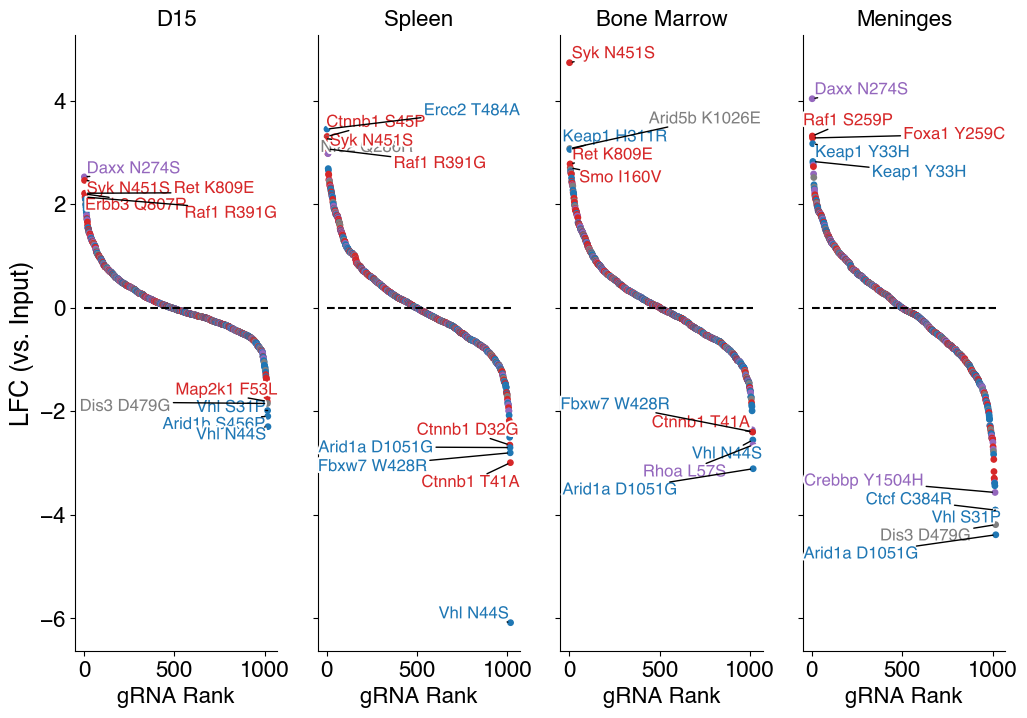

In [19]:
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects

min_edit = 0

CBE_targ = cc1[(cc1['Editor']=='CBE') & (cc1['classification']=='targeting guide')& (cc1['target_base_edit_perc']>=min_edit)]
ABE_targ = cc1[(cc1['Editor']=='ABE') & (cc1['classification']=='targeting guide') & (cc1['target_base_edit_perc']>=min_edit)]


#-----and plotting--------
names2 = ['In Vitro D15','Spleen', 'Bone', 'Meninges',]

color_dict = {'Oncogene':'tab:red', 'Oncogene/TSG':'tab:purple', 'TSG':'tab:blue', 'Undefined':'tab:grey'}

fig, ax = plt.subplots(1,4,figsize=(12,8), sharey=True)

for k, val in enumerate(names2):
    #cc = CBE_mageck_dict[val].rename(columns={'sgrna':'gRNA_id'})
    #cc2 = pd.merge(cc, CBE_targ, on='gRNA_id')
    #cc2 = cc2.sort_values(by='LFC', ascending=False)

    cc2 = ABE_targ.sort_values(by=f'LFC_{val}', ascending=False)

    cc2['Rank'] = range(1, len(cc2)+1)
    cc2['color'] = [color_dict[i] for i in cc2['Role in Cancer']]

    ax[k].scatter(cc2['Rank'], cc2[f'LFC_{val}'],color=cc2['color'], s=15)

    ax[k].spines[['top', 'right']].set_visible(False)
    ax[k].tick_params(axis='both', which='major', labelsize=16,)
    ax[k].plot([1, len(cc2)+1], [0,0], linestyle='dashed', color='black')
    ax[k].set_xlabel('gRNA Rank', fontsize=16)

    #and annotate top and bottom 5 variant
    top = cc2[:5]
    bottom = cc2[-5:]
    tb = pd.concat((top, bottom))

    t = []
    x = []
    y = []
    c = []

    print(val)
    for i, val2 in tb.iterrows():
        y.append(val2[f'LFC_{val}'])
        x.append(val2['Rank'])
        c.append(val2['color'])
        a = val2['HGVSp_m']
        if a=='Not calculated (legacy)':
            a = val2['HGVSp_h'] + ' (human)'
        b = val2['gene_name_m']
        t.append(f'{b} {a}')


        print(f'{val2["Rank"]} {b} {a} {val2["color"]}')
    texts = [ax[k].text(x[i], y[i], t[i], fontsize=12, color=c[i], path_effects=[PathEffects.withStroke(linewidth=3,foreground="w")]) for i in range(len(x))] #bbox = dict(boxstyle = 'round,pad=0.5', fc = 'white', alpha = .9)

    adjust_text(texts, only_move={'points':'xy', 'texts':'xy'}, ax=ax[k], arrowprops=dict(arrowstyle="-", linewidth=1, alpha=1, color='black'))


#ax.set_ylim(0,20)

ax[0].set_ylabel('LFC (vs. Input)', fontsize=18)
ax[0].set_title('D15', fontsize=16)
ax[1].set_title('Spleen', fontsize=16)
ax[2].set_title('Bone Marrow', fontsize=16)
ax[3].set_title('Meninges', fontsize=16)

In Vitro D15
1 Kmt2b R2717C tab:grey
2 Tcf7l2 P392S tab:red
3 Keap1 T142M tab:blue
4 Rab35 R69H tab:grey
5 Gata2 P175L tab:red
12760 Pgr P824S tab:grey
12761 Grin2a P1366S tab:blue
12762 Rb1 p.E322K (human) tab:blue
12763 Slx4 R134Q tab:grey
12764 Epha5 p.D568N (human) tab:grey
Spleen
1 Kdm5a A1569V tab:red
2 Flt4 p.G1154R (human) tab:red
3 Tek R167W tab:grey
4 Dnmt3c R285H tab:grey
5 Gnas R1004C tab:red
12760 Kmt2a P2048S tab:red
12761 Ikzf1 E29K tab:blue
12762 Piga C36Y tab:grey
12763 Ptprs p.R610W (human) tab:grey
12764 Epha5 p.D568N (human) tab:grey
Bone
1 Kdm5a A1569V tab:red
2 Tek R167W tab:grey
3 Apc Q976* tab:blue
4 Palb2 Q962* tab:blue
5 Zfhx3 R3006W tab:blue
12760 Ptprs p.R610W (human) tab:grey
12761 Ikzf1 E29K tab:blue
12762 Piga C36Y tab:grey
12763 Epha5 p.D568N (human) tab:grey
12764 Smarca4 A945T tab:blue
Meninges
1 Btk R28H tab:purple
2 Ptprt E1324K tab:blue
3 Gata3 R275W tab:purple
4 Axl G833E tab:grey
5 Prex2 E560K tab:red
12760 Insr D569N tab:grey
12761 Wt1 R462Q tab:

Text(0.5, 1.0, 'Meninges')

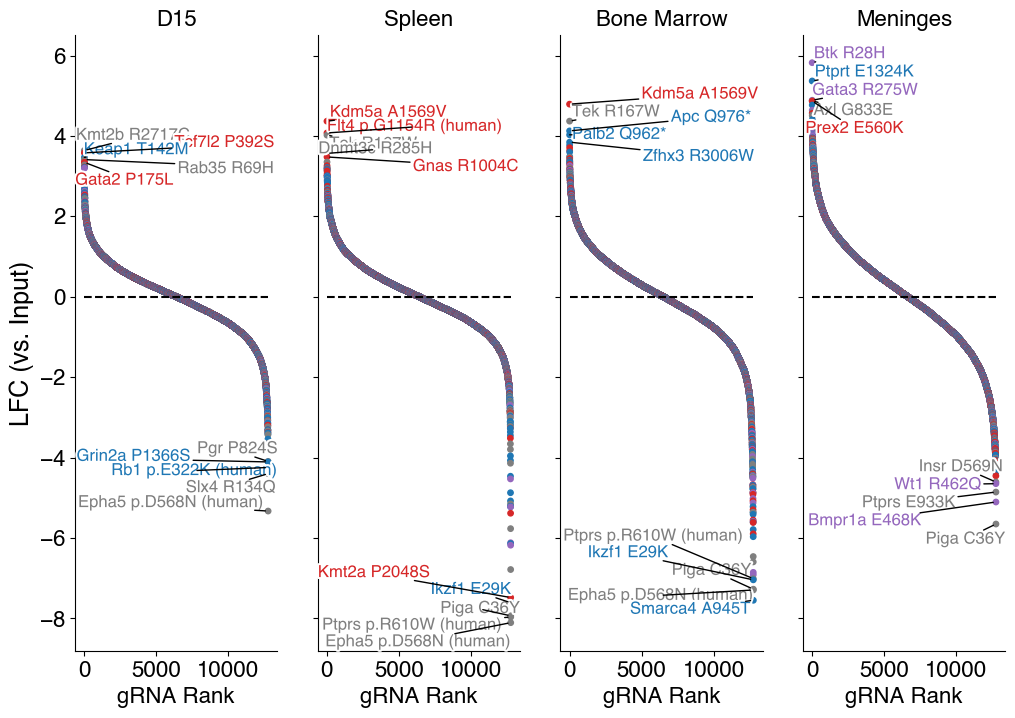

In [20]:
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects


min_edit = 0


CBE_targ = cc1[(cc1['Editor']=='CBE') & (cc1['classification']=='targeting guide')& (cc1['target_base_edit_perc']>=min_edit)]
ABE_targ = cc1[(cc1['Editor']=='ABE') & (cc1['classification']=='targeting guide') & (cc1['target_base_edit_perc']>=min_edit)]

#-----and plotting--------
names2 = ['In Vitro D15','Spleen', 'Bone', 'Meninges',]

color_dict = {'Oncogene':'tab:red', 'Oncogene/TSG':'tab:purple', 'TSG':'tab:blue', 'Undefined':'tab:grey'}

fig, ax = plt.subplots(1,4,figsize=(12,8), sharey=True)

for k, val in enumerate(names2):
    #cc = CBE_mageck_dict[val].rename(columns={'sgrna':'gRNA_id'})
    #cc2 = pd.merge(cc, CBE_targ, on='gRNA_id')
    #cc2 = cc2.sort_values(by='LFC', ascending=False)

    cc2 = CBE_targ.sort_values(by=f'LFC_{val}', ascending=False)

    cc2['Rank'] = range(1, len(cc2)+1)
    cc2['color'] = [color_dict[i] for i in cc2['Role in Cancer']]

    ax[k].scatter(cc2['Rank'], cc2[f'LFC_{val}'],color=cc2['color'], s=15)

    ax[k].spines[['top', 'right']].set_visible(False)
    ax[k].tick_params(axis='both', which='major', labelsize=16,)
    ax[k].plot([1, len(cc2)+1], [0,0], linestyle='dashed', color='black')
    ax[k].set_xlabel('gRNA Rank', fontsize=16)

    #and annotate top and bottom 5 variant
    top = cc2[:5]
    bottom = cc2[-5:]
    tb = pd.concat((top, bottom))

    t = []
    x = []
    y = []
    c = []
    print(val)
    for i, val2 in tb.iterrows():
        y.append(val2[f'LFC_{val}'])
        x.append(val2['Rank'])
        c.append(val2['color'])
        a = val2['HGVSp_m']
        if a=='Not calculated (legacy)':
            a = val2['HGVSp_h'] + ' (human)'
        b = val2['gene_name_m']
        t.append(f'{b} {a}')

        print(f'{val2["Rank"]} {b} {a} {val2["color"]}')

    texts = [ax[k].text(x[i], y[i], t[i], fontsize=12, color=c[i], path_effects=[PathEffects.withStroke(linewidth=3,foreground="w")]) for i in range(len(x))] #bbox = dict(boxstyle = 'round,pad=0.5', fc = 'white', alpha = .9)

    adjust_text(texts, only_move={'points':'xy', 'texts':'xy'}, ax=ax[k], arrowprops=dict(arrowstyle="-", linewidth=1, alpha=1, color='black'))


#ax.set_ylim(0,20)

ax[0].set_ylabel('LFC (vs. Input)', fontsize=18)
ax[0].set_title('D15', fontsize=16)
ax[1].set_title('Spleen', fontsize=16)
ax[2].set_title('Bone Marrow', fontsize=16)
ax[3].set_title('Meninges', fontsize=16)

## 6b

In Vitro D15
1 Erbb3 Q807R tab:red
2 Myc T73A tab:red
3 Keap1 Y33H tab:blue
4 Arid5b K1026E tab:grey
5 Ep300 H350R tab:blue
181 Pik3r1 L570P tab:blue
182 Arid1a D1051G tab:blue
183 Setd2 Y1640C tab:blue
184 Cbfb M101V tab:blue
185 Vhl N44S tab:blue
Spleen
1 Ctnnb1 S45P tab:red
2 Smo I160V tab:red
3 Ret K809E tab:red
4 Rara T253A tab:red
5 Trp53 R277G tab:purple
181 Fbxw7 H463R tab:blue
182 Crebbp Y1504H tab:purple
183 Arid1a D1051G tab:blue
184 Fbxw7 W428R tab:blue
185 Vhl N44S tab:blue
Bone
1 Arid5b K1026E tab:grey
2 Smo I160V tab:red
3 Myd88 M219T tab:red
4 Irs1 V277A tab:grey
5 Stat3 H410R tab:red
181 Igf1r D556G tab:grey
182 Crebbp Y1504H tab:purple
183 Fbxw7 W428R tab:blue
184 Vhl N44S tab:blue
185 Arid1a D1051G tab:blue
Meninges
1 Keap1 Y33H tab:blue
2 Keap1 Y33H tab:blue
3 Nkx2-1 Y174C tab:purple
4 Erbb3 Q807R tab:red
5 Ncoa3 M1396V tab:grey
181 Trp53 Y123H tab:purple
182 Akt1 W80R tab:red
183 Pik3cg L44P tab:grey
184 Crebbp Y1504H tab:purple
185 Arid1a D1051G tab:blue


Text(0.5, 1.0, 'Meninges')

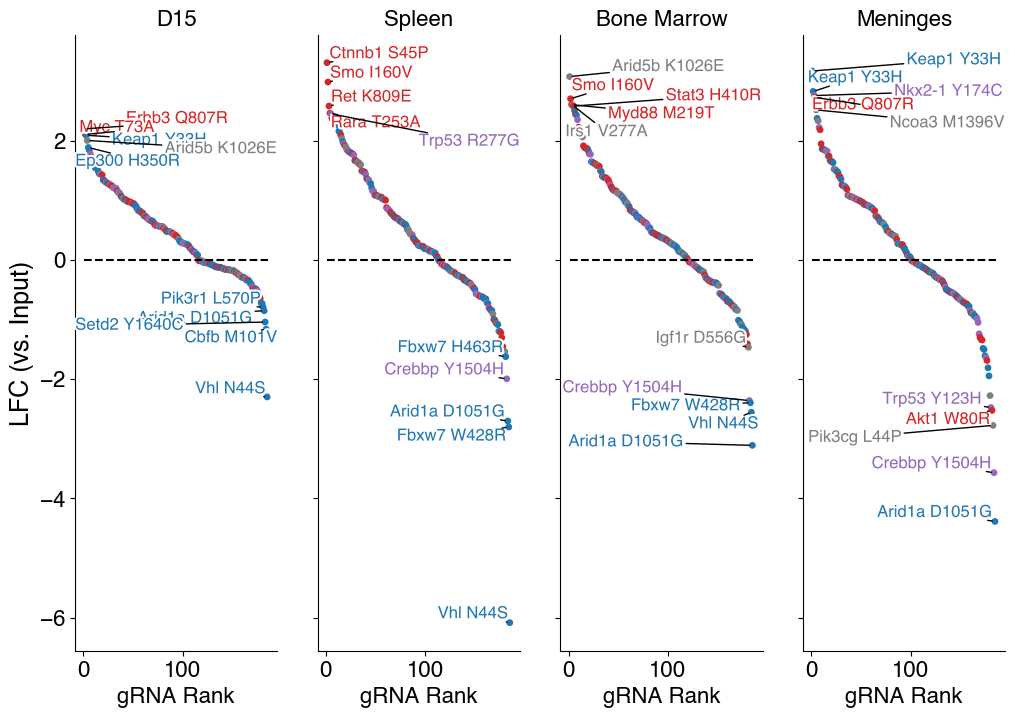

In [21]:
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects

min_edit = 90

CBE_targ = cc1[(cc1['Editor']=='CBE') & (cc1['classification']=='targeting guide')& (cc1['target_base_edit_perc']>=min_edit)]
ABE_targ = cc1[(cc1['Editor']=='ABE') & (cc1['classification']=='targeting guide') & (cc1['target_base_edit_perc']>=min_edit)]


#-----and plotting--------
names2 = ['In Vitro D15','Spleen', 'Bone', 'Meninges',]

color_dict = {'Oncogene':'tab:red', 'Oncogene/TSG':'tab:purple', 'TSG':'tab:blue', 'Undefined':'tab:grey'}

fig, ax = plt.subplots(1,4,figsize=(12,8), sharey=True)

for k, val in enumerate(names2):
    #cc = CBE_mageck_dict[val].rename(columns={'sgrna':'gRNA_id'})
    #cc2 = pd.merge(cc, CBE_targ, on='gRNA_id')
    #cc2 = cc2.sort_values(by='LFC', ascending=False)

    cc2 = ABE_targ.sort_values(by=f'LFC_{val}', ascending=False)

    cc2['Rank'] = range(1, len(cc2)+1)
    cc2['color'] = [color_dict[i] for i in cc2['Role in Cancer']]

    ax[k].scatter(cc2['Rank'], cc2[f'LFC_{val}'],color=cc2['color'], s=15)

    ax[k].spines[['top', 'right']].set_visible(False)
    ax[k].tick_params(axis='both', which='major', labelsize=16,)
    ax[k].plot([1, len(cc2)+1], [0,0], linestyle='dashed', color='black')
    ax[k].set_xlabel('gRNA Rank', fontsize=16)

    #and annotate top and bottom 5 variant
    top = cc2[:5]
    bottom = cc2[-5:]
    tb = pd.concat((top, bottom))

    t = []
    x = []
    y = []
    c = []

    print(val)
    for i, val2 in tb.iterrows():
        y.append(val2[f'LFC_{val}'])
        x.append(val2['Rank'])
        c.append(val2['color'])
        a = val2['HGVSp_m']
        if a=='Not calculated (legacy)':
            a = val2['HGVSp_h'] + ' (human)'
        b = val2['gene_name_m']
        t.append(f'{b} {a}')


        print(f'{val2["Rank"]} {b} {a} {val2["color"]}')
    texts = [ax[k].text(x[i], y[i], t[i], fontsize=12, color=c[i], path_effects=[PathEffects.withStroke(linewidth=3,foreground="w")]) for i in range(len(x))] #bbox = dict(boxstyle = 'round,pad=0.5', fc = 'white', alpha = .9)

    adjust_text(texts, only_move={'points':'xy', 'texts':'xy'}, ax=ax[k], arrowprops=dict(arrowstyle="-", linewidth=1, alpha=1, color='black'))


#ax.set_ylim(0,20)

ax[0].set_ylabel('LFC (vs. Input)', fontsize=18)
ax[0].set_title('D15', fontsize=16)
ax[1].set_title('Spleen', fontsize=16)
ax[2].set_title('Bone Marrow', fontsize=16)
ax[3].set_title('Meninges', fontsize=16)

In Vitro D15
1 Gata2 P175L tab:red
2 Dnmt3a P800L tab:blue
3 Crebbp R482Q tab:purple
4 Ptprs R925C tab:grey
5 Kmt2d Q3515* tab:purple
1663 Runx1 E41K tab:purple
1664 Kdm6a R395Q tab:purple
1665 Amer1 R885Q tab:blue
1666 Ptprs R845H tab:grey
1667 Grin2a P1366S tab:blue
Spleen
1 Flt4 p.G1154R (human) tab:red
2 Gnas R1004C tab:red
3 Keap1 R413C tab:blue
4 Card11 R967C tab:red
5 Ptprt E831K tab:blue
1663 Smarca4 R1385* tab:blue
1664 Top1 P610L tab:grey
1665 Dnmt3a P800L tab:blue
1666 Smarca4 A945T tab:blue
1667 Sesn2 R95C tab:grey
Bone
1 Ptprt E831K tab:blue
2 Rras2 G23S tab:red
3 Pgr S80L tab:grey
4 Gata3 S242F tab:purple
5 Mga R1151* tab:grey
1663 Dnmt3a P800L tab:blue
1664 Smarca4 R1584W tab:blue
1665 Smarca4 R978Q tab:blue
1666 Smarca4 R1385* tab:blue
1667 Smarca4 A945T tab:blue
Meninges
1 Gata3 R275W tab:purple
2 Axl G833E tab:grey
3 Prdm14 P413L tab:grey
4 Epas1 E287K tab:purple
5 Dnmt3a P800L tab:blue
1663 Pim1 C17Y tab:red
1664 Fgfr3 R567W tab:red
1665 Bmpr1a E468K tab:purple
1666 

Text(0.5, 1.0, 'Meninges')

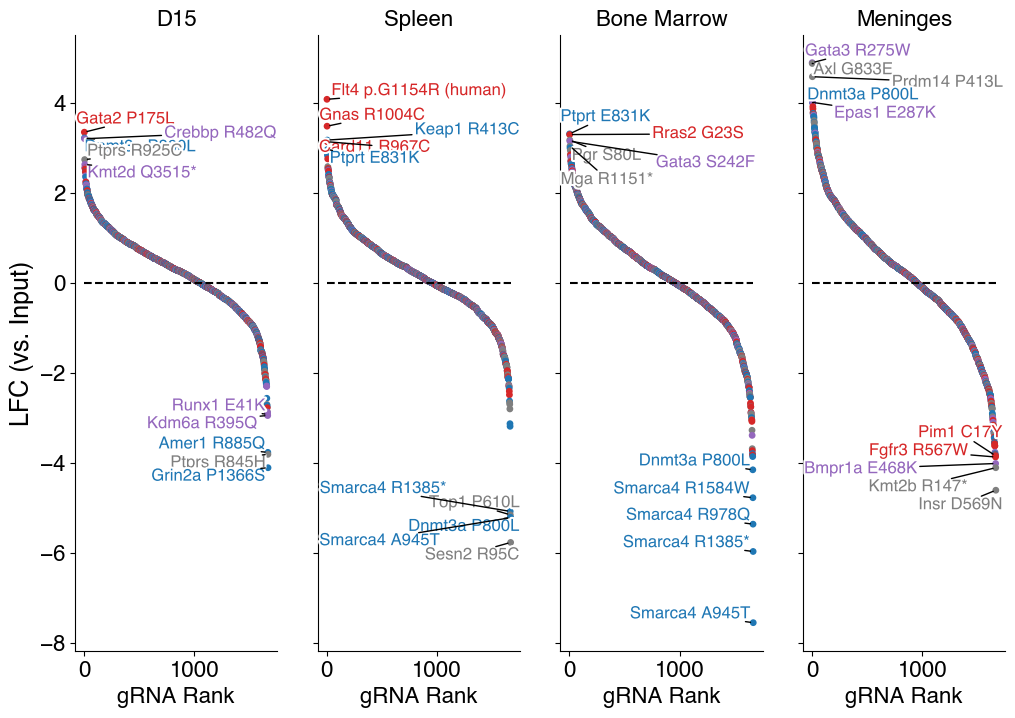

In [22]:
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects


min_edit = 90


CBE_targ = cc1[(cc1['Editor']=='CBE') & (cc1['classification']=='targeting guide')& (cc1['target_base_edit_perc']>=min_edit)]
ABE_targ = cc1[(cc1['Editor']=='ABE') & (cc1['classification']=='targeting guide') & (cc1['target_base_edit_perc']>=min_edit)]

#-----and plotting--------
names2 = ['In Vitro D15','Spleen', 'Bone', 'Meninges',]

color_dict = {'Oncogene':'tab:red', 'Oncogene/TSG':'tab:purple', 'TSG':'tab:blue', 'Undefined':'tab:grey'}

fig, ax = plt.subplots(1,4,figsize=(12,8), sharey=True)

for k, val in enumerate(names2):
    #cc = CBE_mageck_dict[val].rename(columns={'sgrna':'gRNA_id'})
    #cc2 = pd.merge(cc, CBE_targ, on='gRNA_id')
    #cc2 = cc2.sort_values(by='LFC', ascending=False)

    cc2 = CBE_targ.sort_values(by=f'LFC_{val}', ascending=False)

    cc2['Rank'] = range(1, len(cc2)+1)
    cc2['color'] = [color_dict[i] for i in cc2['Role in Cancer']]

    ax[k].scatter(cc2['Rank'], cc2[f'LFC_{val}'],color=cc2['color'], s=15)

    ax[k].spines[['top', 'right']].set_visible(False)
    ax[k].tick_params(axis='both', which='major', labelsize=16,)
    ax[k].plot([1, len(cc2)+1], [0,0], linestyle='dashed', color='black')
    ax[k].set_xlabel('gRNA Rank', fontsize=16)

    #and annotate top and bottom 5 variant
    top = cc2[:5]
    bottom = cc2[-5:]
    tb = pd.concat((top, bottom))

    t = []
    x = []
    y = []
    c = []
    print(val)
    for i, val2 in tb.iterrows():
        y.append(val2[f'LFC_{val}'])
        x.append(val2['Rank'])
        c.append(val2['color'])
        a = val2['HGVSp_m']
        if a=='Not calculated (legacy)':
            a = val2['HGVSp_h'] + ' (human)'
        b = val2['gene_name_m']
        t.append(f'{b} {a}')

        print(f'{val2["Rank"]} {b} {a} {val2["color"]}')

    texts = [ax[k].text(x[i], y[i], t[i], fontsize=12, color=c[i], path_effects=[PathEffects.withStroke(linewidth=3,foreground="w")]) for i in range(len(x))] #bbox = dict(boxstyle = 'round,pad=0.5', fc = 'white', alpha = .9)

    adjust_text(texts, only_move={'points':'xy', 'texts':'xy'}, ax=ax[k], arrowprops=dict(arrowstyle="-", linewidth=1, alpha=1, color='black'))


#ax.set_ylim(0,20)

ax[0].set_ylabel('LFC (vs. Input)', fontsize=18)
ax[0].set_title('D15', fontsize=16)
ax[1].set_title('Spleen', fontsize=16)
ax[2].set_title('Bone Marrow', fontsize=16)
ax[3].set_title('Meninges', fontsize=16)

## 6c

In Vitro D15
1 Raf1 R391G tab:red
2 Myc T73A tab:red
3 Rbm10 H777R tab:blue
4 Runx1 R149G tab:purple
5 Flt3 R848G tab:red
281 Vhl L124P tab:blue
282 Cbfb M101V tab:blue
283 Traf7 Y562C tab:blue
284 Vhl L124P tab:blue
285 Braf K638E tab:red
Spleen
1 Nfe2 Q286R tab:grey
2 Raf1 R391G tab:red
3 Smo I160V tab:red
4 Rara T253A tab:red
5 Fgf4 R108G tab:grey
281 Crebbp W1503R tab:purple
282 Smc1a L225P tab:blue
283 Crebbp Y1504H tab:purple
284 Ctnnb1 D32G tab:red
285 Arid1a D1051G tab:blue
Bone
1 Smo I160V tab:red
2 Myd88 M219T tab:red
3 Stat3 H410R tab:red
4 Csf3r T774A tab:red
5 Foxo1 M1V tab:purple
281 Fbxw7 S585P tab:blue
282 Cbl I381M tab:purple
283 Ctnnb1 D32G tab:red
284 Crebbp Y1504H tab:purple
285 Arid1a D1051G tab:blue
Meninges
1 Raf1 S259P tab:red
2 Foxa1 Y259C tab:red
3 Nkx2-1 Y174C tab:purple
4 Ncoa3 M1396V tab:grey
5 Rbm10 H777R tab:blue
281 Akt1 W80R tab:red
282 Cbl W406R tab:purple
283 Egfr H872R tab:red
284 Crebbp Y1504H tab:purple
285 Arid1a D1051G tab:blue


Text(0.5, 1.0, 'Meninges')

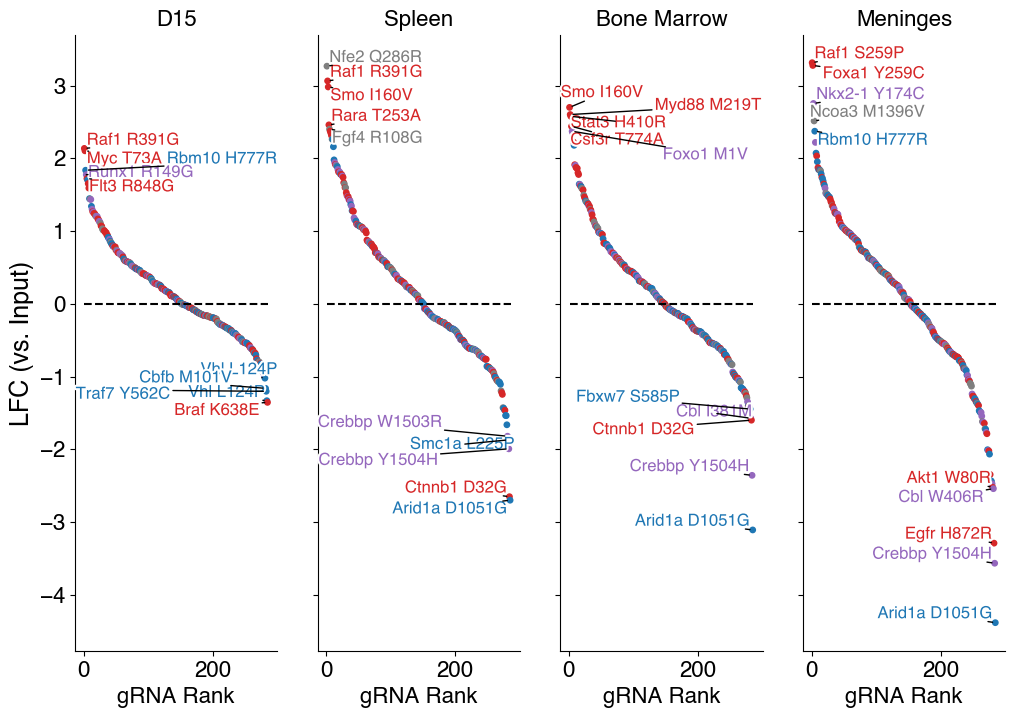

In [23]:
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects



min_edit = 50

CBE_targ = cc1[(cc1['Editor']=='CBE') & (cc1['classification']=='targeting guide')& (cc1['corr_perc']>=min_edit)]
ABE_targ = cc1[(cc1['Editor']=='ABE') & (cc1['classification']=='targeting guide') & (cc1['corr_perc']>=min_edit)]


#-----and plotting--------
names2 = ['In Vitro D15','Spleen', 'Bone', 'Meninges',]

color_dict = {'Oncogene':'tab:red', 'Oncogene/TSG':'tab:purple', 'TSG':'tab:blue', 'Undefined':'tab:grey'}

fig, ax = plt.subplots(1,4,figsize=(12,8), sharey=True)

for k, val in enumerate(names2):
    #cc = CBE_mageck_dict[val].rename(columns={'sgrna':'gRNA_id'})
    #cc2 = pd.merge(cc, CBE_targ, on='gRNA_id')
    #cc2 = cc2.sort_values(by='LFC', ascending=False)

    cc2 = ABE_targ.sort_values(by=f'LFC_{val}', ascending=False)

    cc2['Rank'] = range(1, len(cc2)+1)
    cc2['color'] = [color_dict[i] for i in cc2['Role in Cancer']]

    ax[k].scatter(cc2['Rank'], cc2[f'LFC_{val}'],color=cc2['color'], s=15)

    ax[k].spines[['top', 'right']].set_visible(False)
    ax[k].tick_params(axis='both', which='major', labelsize=16,)
    ax[k].plot([1, len(cc2)+1], [0,0], linestyle='dashed', color='black')
    ax[k].set_xlabel('gRNA Rank', fontsize=16)

    #and annotate top and bottom 5 variant
    top = cc2[:5]
    bottom = cc2[-5:]
    tb = pd.concat((top, bottom))

    t = []
    x = []
    y = []
    c = []

    print(val)
    for i, val2 in tb.iterrows():
        y.append(val2[f'LFC_{val}'])
        x.append(val2['Rank'])
        c.append(val2['color'])
        a = val2['HGVSp_m']
        if a=='Not calculated (legacy)':
            a = val2['HGVSp_h'] + ' (human)'
        b = val2['gene_name_m']
        t.append(f'{b} {a}')


        print(f'{val2["Rank"]} {b} {a} {val2["color"]}')
    texts = [ax[k].text(x[i], y[i], t[i], fontsize=12, color=c[i], path_effects=[PathEffects.withStroke(linewidth=3,foreground="w")]) for i in range(len(x))] #bbox = dict(boxstyle = 'round,pad=0.5', fc = 'white', alpha = .9)

    adjust_text(texts, only_move={'points':'xy', 'texts':'xy'}, ax=ax[k], arrowprops=dict(arrowstyle="-", linewidth=1, alpha=1, color='black'))


#ax.set_ylim(0,20)

ax[0].set_ylabel('LFC (vs. Input)', fontsize=18)
ax[0].set_title('D15', fontsize=16)
ax[1].set_title('Spleen', fontsize=16)
ax[2].set_title('Bone Marrow', fontsize=16)
ax[3].set_title('Meninges', fontsize=16)

In Vitro D15
1 Bap1 Q683* tab:blue
2 Kmt2d R2643* tab:purple
3 Nf1 Non-coding tab:blue
4 Kdm6a E745K tab:purple
5 Kdm6a Q1229* tab:purple
607 Smarca4 R1385* tab:blue
608 Sf3b1 R957Q tab:red
609 Amer1 R885Q tab:blue
610 Ptprs R845H tab:grey
611 Grin2a P1366S tab:blue
Spleen
1 Ptprt E1037K tab:blue
2 Tgfbr2 D549N tab:blue
3 Tgfbr2 R338W tab:blue
4 Axin2 R339H tab:blue
5 Erbb3 R1306H tab:red
607 Setdb1 E714K tab:red
608 Hoxb13 W179* tab:grey
609 Arid1a A2067T tab:blue
610 Smarca4 R1385* tab:blue
611 Smarca4 A945T tab:blue
Bone
1 Ntrk3 p.R582Q (human) tab:red
2 Nf1 Non-coding tab:blue
3 Notch3 E2206K tab:grey
4 Erbb3 R1306H tab:red
5 Ptprt E1037K tab:blue
607 Notch1 E437K tab:purple
608 Kmt2d R4535* tab:purple
609 Brd4 D1056N tab:red
610 Smarca4 R1385* tab:blue
611 Smarca4 A945T tab:blue
Meninges
1 Id3 Q63* tab:blue
2 Ptch1 A225V tab:blue
3 Idh2 D439N tab:red
4 Dnmt3a R297W tab:blue
5 Ntrk3 A124T tab:red
607 Brd4 D1056N tab:red
608 Setdb1 E714K tab:red
609 Smarca4 A945T tab:blue
610 Ercc5 

Text(0.5, 1.0, 'Meninges')

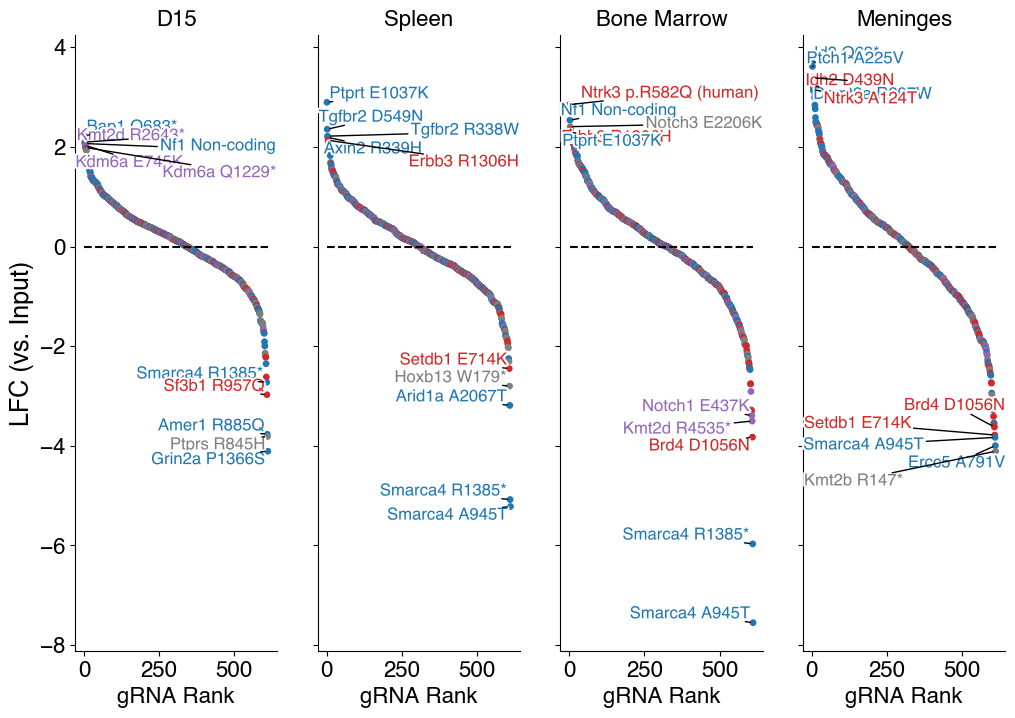

In [24]:
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects


min_edit = 50


CBE_targ = cc1[(cc1['Editor']=='CBE') & (cc1['classification']=='targeting guide')& (cc1['corr_perc']>=min_edit)]
ABE_targ = cc1[(cc1['Editor']=='ABE') & (cc1['classification']=='targeting guide') & (cc1['corr_perc']>=min_edit)]

#-----and plotting--------
names2 = ['In Vitro D15','Spleen', 'Bone', 'Meninges',]

color_dict = {'Oncogene':'tab:red', 'Oncogene/TSG':'tab:purple', 'TSG':'tab:blue', 'Undefined':'tab:grey'}

fig, ax = plt.subplots(1,4,figsize=(12,8), sharey=True)

for k, val in enumerate(names2):
    #cc = CBE_mageck_dict[val].rename(columns={'sgrna':'gRNA_id'})
    #cc2 = pd.merge(cc, CBE_targ, on='gRNA_id')
    #cc2 = cc2.sort_values(by='LFC', ascending=False)

    cc2 = CBE_targ.sort_values(by=f'LFC_{val}', ascending=False)

    cc2['Rank'] = range(1, len(cc2)+1)
    cc2['color'] = [color_dict[i] for i in cc2['Role in Cancer']]

    ax[k].scatter(cc2['Rank'], cc2[f'LFC_{val}'],color=cc2['color'], s=15)

    ax[k].spines[['top', 'right']].set_visible(False)
    ax[k].tick_params(axis='both', which='major', labelsize=16,)
    ax[k].plot([1, len(cc2)+1], [0,0], linestyle='dashed', color='black')
    ax[k].set_xlabel('gRNA Rank', fontsize=16)

    #and annotate top and bottom 5 variant
    top = cc2[:5]
    bottom = cc2[-5:]
    tb = pd.concat((top, bottom))

    t = []
    x = []
    y = []
    c = []
    print(val)
    for i, val2 in tb.iterrows():
        y.append(val2[f'LFC_{val}'])
        x.append(val2['Rank'])
        c.append(val2['color'])
        a = val2['HGVSp_m']
        if a=='Not calculated (legacy)':
            a = val2['HGVSp_h'] + ' (human)'
        b = val2['gene_name_m']
        t.append(f'{b} {a}')

        print(f'{val2["Rank"]} {b} {a} {val2["color"]}')

    texts = [ax[k].text(x[i], y[i], t[i], fontsize=12, color=c[i], path_effects=[PathEffects.withStroke(linewidth=3,foreground="w")]) for i in range(len(x))] #bbox = dict(boxstyle = 'round,pad=0.5', fc = 'white', alpha = .9)

    adjust_text(texts, only_move={'points':'xy', 'texts':'xy'}, ax=ax[k], arrowprops=dict(arrowstyle="-", linewidth=1, alpha=1, color='black'))


#ax.set_ylim(0,20)

ax[0].set_ylabel('LFC (vs. Input)', fontsize=18)
ax[0].set_title('D15', fontsize=16)
ax[1].set_title('Spleen', fontsize=16)
ax[2].set_title('Bone Marrow', fontsize=16)
ax[3].set_title('Meninges', fontsize=16)

# Extended Data Figure 7

In [25]:
master = pd.read_csv('master_table_min50_control_mean_invitro.csv')

master_targ = master[master['classification']=='targeting guide']

In [26]:
g_list = [['gRNA_9136',
  'gRNA_12301',
  'gRNA_11691',
  'gRNA_8582',
  'gRNA_1840',
  'gRNA_12765',
  'gRNA_13106',
  'gRNA_8374',
  'gRNA_7939',
  'gRNA_8196'],
 ['gRNA_13064',
  'gRNA_3372',
  'gRNA_9609',
  'gRNA_2000',
  'gRNA_3434',
  'gRNA_3520',
  'gRNA_7046',
  'gRNA_11459',
  'gRNA_13096',
  'gRNA_2280'],
 ['gRNA_1279',
  'gRNA_5933',
  'gRNA_3117',
  'gRNA_11197',
  'gRNA_3727',
  'gRNA_1067',
  'gRNA_8419',
  'gRNA_7163',
  'gRNA_6018',
  'gRNA_3825'],
 ['gRNA_2474',
  'gRNA_1719',
  'gRNA_2218',
  'gRNA_7652',
  'gRNA_7038',
  'gRNA_4034',
  'gRNA_11138',
  'gRNA_1140',
  'gRNA_7796',
  'gRNA_7708']]

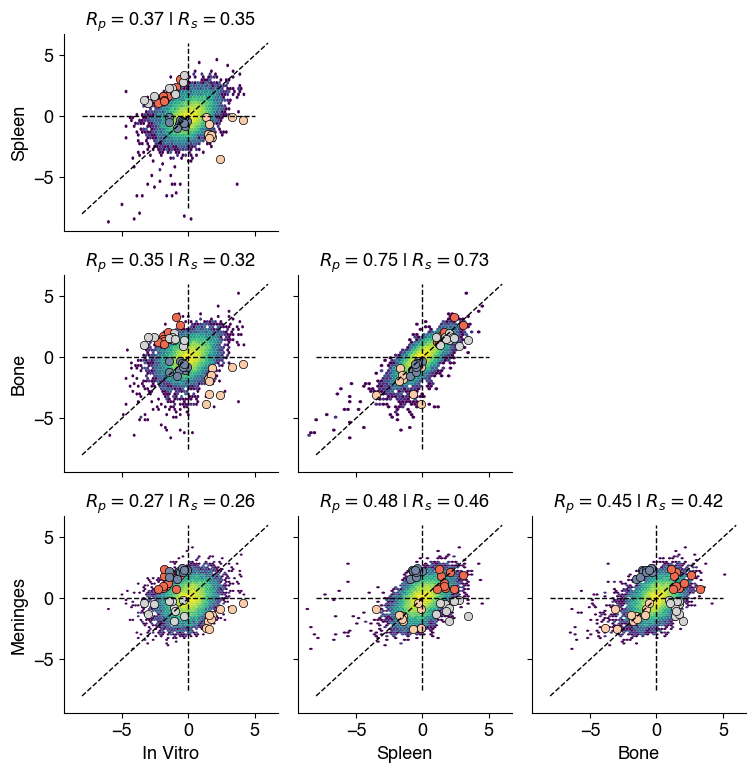

In [27]:
samples = ['Z_In Vitro D15', 'Z_Spleen', 'Z_Bone', 'Z_Meninges']

fig, ax = plt.subplots(4,4,figsize=(10,10), sharex=True, sharey=True)

palette = ['#F9CBA8', '#ED6A50', '#7284A1', 'lightgrey', 'darkslategray']


s_dict = {'Z_In Vitro D15': 'In Vitro', 'Z_Spleen': 'Spleen', 'Z_Bone': 'Bone', 'Z_Meninges': 'Meninges'}
for idx, samp in enumerate(samples):

    row = idx
    for idx2, samp2 in enumerate(samples):
        col = idx2
        ax[row][col].hexbin(master_targ[samp2], master_targ[samp], bins='log', gridsize=50, linewidth=0)

        ax[row][col].plot([0,0],[-7.5,6], linestyle='dashed', color='black', linewidth=1)
        ax[row][col].plot([-8,5],[0,0], linestyle='dashed', color='black', linewidth=1)
        ax[row][col].plot([-8,6],[-8,6], linestyle='dashed', color='black', linewidth=1)

        ax[row][0].set_ylabel(s_dict[samp], fontsize=13)
        ax[3][col].set_xlabel(s_dict[samp2], fontsize=13)
    #ax[idx//3][idx%3].set_xticklabels(['S', 'B', 'M'])
    #ax[idx//3][idx%3].set_yticklabels(['IV', 'S', 'B',])
    #ax[idx//3][idx%3].set_title(f'{gene}', fontsize=12)

        ax[row][col].spines[['top', 'right']].set_visible(False)

        ax[row][col].tick_params(axis='both', which='major', labelsize=13,)

        spear = np.round(scipy.stats.spearmanr(master_targ[samp2], master_targ[samp]).statistic, 2)
        pear = np.round(scipy.stats.pearsonr(master_targ[samp2], master_targ[samp]).statistic, 2)

        ax[row][col].set_title('$R_{p} = $' + f'{pear}' + ' | $R_{s} = $' + f'{spear}', fontsize=13)
        #and also add scatter plot points
        for idx3, k in enumerate(g_list):
            #gene_of_interest = embedded[lfc_table[lfc_table['gRNA_id'].isin(k)].index]

            gene_of_interest = master_targ[master_targ['gRNA_id'].isin(k)]

            ax[row][col].scatter(list(gene_of_interest[samp2]), list(gene_of_interest[samp]),  alpha=1, color=palette[idx3], edgecolor='black', linewidth=.5)


fig.delaxes(ax[0][0])
fig.delaxes(ax[0][1])
fig.delaxes(ax[0][2])
fig.delaxes(ax[0][3])
fig.delaxes(ax[1][1])
fig.delaxes(ax[1][2])
fig.delaxes(ax[1][3])
fig.delaxes(ax[2][2])
fig.delaxes(ax[2][3])
fig.delaxes(ax[3][3])

fig.tight_layout()
#fig.savefig('figures/extended_6_corr.pdf')

# Extended Data Figure 8

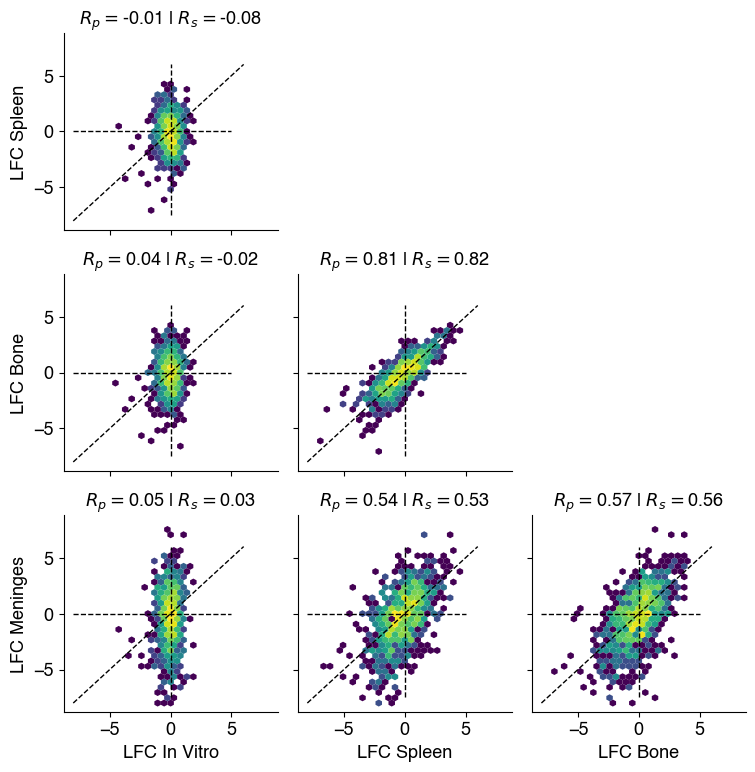

In [28]:
KO = pd.read_csv('KO_LFC.csv')

samples = ['LFC_d15', 'LFC_spleen', 'LFC_bone', 'LFC_meninges']

fig, ax = plt.subplots(4,4,figsize=(10,10), sharex=True, sharey=True)

palette = ['#F9CBA8', '#ED6A50', '#7284A1', 'lightgrey', 'darkslategray']


s_dict = {'LFC_d15': 'LFC In Vitro', 'LFC_spleen': 'LFC Spleen', 'LFC_bone': 'LFC Bone', 'LFC_meninges': 'LFC Meninges'}
for idx, samp in enumerate(samples):

    row = idx
    for idx2, samp2 in enumerate(samples):
        col = idx2
        ax[row][col].hexbin(KO[samp2], KO[samp], bins='log', gridsize=30, linewidth=0, extent = (-8, 8, -8, 8))

        ax[row][col].plot([0,0],[-7.5,6], linestyle='dashed', color='black', linewidth=1)
        ax[row][col].plot([-8,5],[0,0], linestyle='dashed', color='black', linewidth=1)
        ax[row][col].plot([-8,6],[-8,6], linestyle='dashed', color='black', linewidth=1)

        ax[row][0].set_ylabel(s_dict[samp], fontsize=13)
        ax[3][col].set_xlabel(s_dict[samp2], fontsize=13)
    #ax[idx//3][idx%3].set_xticklabels(['S', 'B', 'M'])
    #ax[idx//3][idx%3].set_yticklabels(['IV', 'S', 'B',])
    #ax[idx//3][idx%3].set_title(f'{gene}', fontsize=12)

        ax[row][col].spines[['top', 'right']].set_visible(False)

        ax[row][col].tick_params(axis='both', which='major', labelsize=13,)

        spear = np.round(scipy.stats.spearmanr(KO[samp2], KO[samp]).statistic, 2)
        pear = np.round(scipy.stats.pearsonr(KO[samp2], KO[samp]).statistic, 2)

        ax[row][col].set_title('$R_{p} = $' + f'{pear}' + ' | $R_{s} = $' + f'{spear}', fontsize=13)
  

fig.delaxes(ax[0][0])
fig.delaxes(ax[0][1])
fig.delaxes(ax[0][2])
fig.delaxes(ax[0][3])
fig.delaxes(ax[1][1])
fig.delaxes(ax[1][2])
fig.delaxes(ax[1][3])
fig.delaxes(ax[2][2])
fig.delaxes(ax[2][3])
fig.delaxes(ax[3][3])

fig.tight_layout()
#fig.savefig('figures/extended_fig_KO_correlations.pdf')

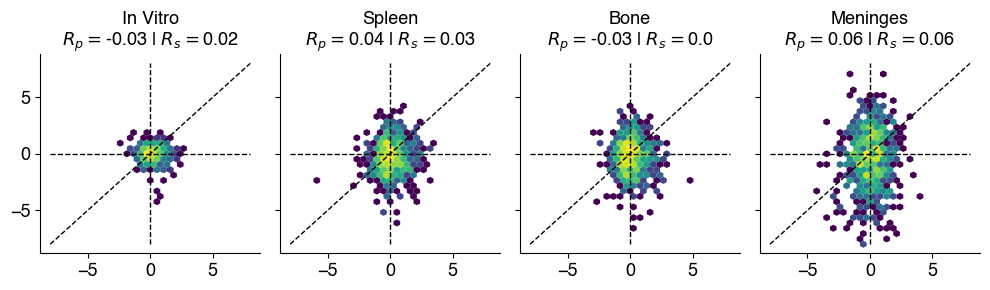

In [29]:
BE = pd.read_csv('master_table_min50_control_mean_invitro.csv')
BE = BE[(BE['classification']=='targeting guide') & (BE['Editor']=='ABE') & (BE['target_base_edit_perc']>=20)]
KO = pd.read_csv('KO_LFC.csv').rename(columns = {'sgrna':'gRNA_id'})

merged = pd.merge(KO, BE, on='gRNA_id')

samples_KO = ['LFC_d15', 'LFC_spleen', 'LFC_bone', 'LFC_meninges']
samples_BE = ['LFC_In Vitro D15', 'LFC_Spleen', 'LFC_Bone', 'LFC_Meninges']
names = ['In Vitro', 'Spleen', 'Bone', "Meninges"]

fig, ax = plt.subplots(1,4,figsize=(10,3), sharex=True, sharey=True)

for i in range(4):

    ax[i].hexbin(merged[samples_BE[i]], merged[samples_KO[i]], bins='log', gridsize=30, linewidth=0, extent = (-8, 8, -8, 8))
    ax[i].plot([0,0],[-8,8], linestyle='dashed', color='black', linewidth=1)
    ax[i].plot([-8,8],[0,0], linestyle='dashed', color='black', linewidth=1)
    ax[i].plot([-8,8],[-8,8], linestyle='dashed', color='black', linewidth=1)
    ax[i].spines[['top', 'right']].set_visible(False)
    ax[i].tick_params(axis='both', which='major', labelsize=13,)

    spear = np.round(scipy.stats.spearmanr(merged[samples_BE[i]], merged[samples_KO[i]]).statistic, 2)
    pear = np.round(scipy.stats.pearsonr(merged[samples_BE[i]], merged[samples_KO[i]]).statistic, 2)

    ax[i].set_title(f'{names[i]}\n' + '$R_{p} = $' + f'{pear}' + ' | $R_{s} = $' + f'{spear}', fontsize=13)

    #ax[i].set_title(names[i], fontsize=14)
    
fig.tight_layout()
#fig.savefig('figures/extended_BE_vs_KO.pdf')